# Slca6a15

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ranksums, mannwhitneyu

In [2]:
gene = 'Slc6a15'

In [3]:
manual = pd.read_csv(gene + '_manual_annotation.csv')
pd.set_option('display.max_columns', None)
manual

,mouse_id,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual
0,30507366,C57BL/6N,f,control,wt (Arvcf),23.2,85.86,53.62,3.02,1.39
1,30507367,C57BL/6N,f,control,wt (Arvcf),22.2,96.75,72.60,2.36,0.68
2,30507398,C57BL/6N,f,control,wt (Arvcf),25.4,92.91,63.67,2.60,0.89
3,30507433,C57BL/6N,f,control,wt (Arvcf),25.0,94.79,67.69,2.42,0.83
4,30507450,C57BL/6N,m,control,wt (Arvcf),29.0,93.61,65.45,2.90,0.99
5,30507474,C57BL/6N,f,control,wt (Arvcf),23.3,88.17,56.22,2.57,1.11
6,30507496,C57BL/6N,m,control,wt (Arvcf),27.8,90.52,59.88,2.58,1.12
7,30507499,C57BL/6N,f,control,wt (Arvcf),28.1,87.44,55.78,3.04,1.31
8,30507500,C57BL/6N,m,control,wt (Arvcf),29.2,78.93,45.73,2.70,1.46
9,30507503,C57BL/6N,m,control,wt (Arvcf),27.3,88.16,56.62,2.72,1.23


In [4]:
filtered_data = pd.read_csv(gene + '_data_filtered_plus_functional_parameter_plus_manual_measurements.csv')
filtered_data

,mouse_id,file,LVIDd_auto,LVIDd_auto_time,LVIDs_auto,LVIDs_auto_time,heart_rate_auto,heart_rate_auto_time,LVIDd_auto_quality_label,LVIDd_auto_quality_flag,LVIDs_auto_quality_label,LVIDs_auto_quality_flag,LV_Vold_auto,LV_Vols_auto,EF_auto,FS_auto,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual,dif_LVIDd,mean_LVIDd,dif_LVIDs,mean_LVIDs,dif_EF,dif_FS
0,30507450,Arvcf_1vX_134.dcm,2.827616,0.283333,0.846221,0.321667,712.871287,0.283333,0.581481,high,0.581481,high,30.273021,1.306686,95.683661,70.072993,C57BL/6N,m,control,wt (Arvcf),29.0,93.61,65.45,2.90,0.99,-0.072384,2.863808,-0.143779,0.918110,2.073661,4.622993
1,30507450,Arvcf_1vX_134.dcm,3.075291,0.367500,1.197093,0.405000,720.000000,0.367500,0.581481,high,0.581481,high,37.183424,3.338336,91.021978,61.073826,C57BL/6N,m,control,wt (Arvcf),29.0,93.61,65.45,2.90,0.99,0.175291,2.987645,0.207093,1.093547,-2.588022,-4.376174
2,30507450,Arvcf_1vX_134.dcm,3.137209,2.225833,1.135174,2.263333,720.000000,2.225833,0.614452,high,0.614452,high,39.033508,2.896510,92.579428,63.815789,C57BL/6N,m,control,wt (Arvcf),29.0,93.61,65.45,2.90,0.99,0.237209,3.018605,0.145174,1.062587,-1.030572,-1.634211
3,30507450,Arvcf_1vX_134.dcm,2.662500,2.309167,0.887500,2.348333,705.882353,2.309167,0.614452,high,0.614452,high,26.097677,1.488461,94.296578,66.666667,C57BL/6N,m,control,wt (Arvcf),29.0,93.61,65.45,2.90,0.99,-0.237500,2.781250,-0.102500,0.938750,0.686578,1.216667
4,30507450,Arvcf_1vX_134.dcm,3.034012,2.644167,1.093895,2.684167,679.245283,2.644167,0.832422,high,0.832422,high,35.977352,2.622500,92.710692,63.945578,C57BL/6N,m,control,wt (Arvcf),29.0,93.61,65.45,2.90,0.99,0.134012,2.967006,0.103895,1.041948,-0.899308,-1.504422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5124,30514959,30524959.dcm,3.013372,4.133333,1.630523,4.093333,648.648649,4.133333,0.720234,high,0.720234,high,35.382494,7.528659,78.722081,45.890411,C57BL/6N,m,control,wt (Slc6a15),29.3,73.61,41.14,2.82,1.74,0.193372,2.916686,-0.109477,1.685262,5.112081,4.750411
5125,30514959,30524959.dcm,2.951453,4.225833,1.589244,4.180000,642.857143,4.225833,0.720234,high,0.720234,high,33.630561,7.043351,79.056696,46.153846,C57BL/6N,m,control,wt (Slc6a15),29.3,73.61,41.14,2.82,1.74,0.131453,2.885727,-0.150756,1.664622,5.446696,5.013846
5126,30514959,30524959.dcm,2.641860,4.600833,1.073256,4.553333,600.000000,4.600833,0.809235,high,0.809235,high,25.599816,2.491558,90.267281,59.375000,C57BL/6N,m,control,wt (Slc6a15),29.3,73.61,41.14,2.82,1.74,-0.178140,2.730930,-0.666744,1.406628,16.657281,18.235000
5127,30514959,30524959.dcm,2.745058,4.700833,1.073256,4.645833,648.648649,4.700833,0.809235,high,0.809235,high,28.142482,2.491558,91.146630,60.902256,C57BL/6N,m,control,wt (Slc6a15),29.3,73.61,41.14,2.82,1.74,-0.074942,2.782529,-0.666744,1.406628,17.536630,19.762256


In [5]:
filtered_data[['LVIDd_auto', 'LVIDs_auto', 'EF_auto', 'FS_auto', 'genotype', 'sex']].groupby(by=['sex','genotype']).agg(['mean', 'std']).round(2).to_latex()

'\\begin{tabular}{llrrrrrrrr}\n\\toprule\n  &        & \\multicolumn{2}{l}{LVIDd\\_auto} & \\multicolumn{2}{l}{LVIDs\\_auto} & \\multicolumn{2}{l}{EF\\_auto} & \\multicolumn{2}{l}{FS\\_auto} \\\\\n  &        &       mean &   std &       mean &   std &    mean &    std &    mean &    std \\\\\nsex & genotype &            &       &            &       &         &        &         &        \\\\\n\\midrule\nf & control &       2.59 &  0.26 &       0.92 &  0.25 &   92.39 &   5.81 &   64.46 &   8.37 \\\\\n  & mutant &       2.59 &  0.30 &       0.99 &  0.34 &   90.27 &  10.40 &   62.08 &  11.28 \\\\\nm & control &       2.74 &  0.25 &       1.05 &  0.21 &   91.01 &   5.06 &   61.77 &   7.26 \\\\\n  & mutant &       2.79 &  0.34 &       1.27 &  0.42 &   84.61 &  14.09 &   54.78 &  12.83 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [6]:
mice_manual = np.unique(manual['mouse_id'])
print(mice_manual)
mice_automatic = np.unique(filtered_data['mouse_id'])
print(mice_automatic)
mice_manual==mice_automatic

[30507366 30507367 30507398 30507433 30507450 30507474 30507496 30507499
 30507500 30507503 30507504 30507679 30507680 30507681 30507682 30507686
 30507688 30507689 30507691 30507840 30514910 30514911 30514916 30514919
 30514920 30514924 30514925 30514927 30514931 30514932 30514946 30514947
 30514949 30514951 30514953 30514956 30514957 30514958 30514959 30514977
 30514978 30514979 30514987 30514989 30514990 30515000 30515001 30515006
 30515018 30515019]
[30507366 30507367 30507398 30507433 30507450 30507474 30507496 30507499
 30507500 30507503 30507504 30507679 30507680 30507681 30507682 30507686
 30507688 30507689 30507691 30507840 30514910 30514911 30514916 30514919
 30514920 30514924 30514925 30514927 30514931 30514932 30514946 30514947
 30514949 30514951 30514953 30514956 30514957 30514958 30514959 30514977
 30514978 30514979 30514987 30514989 30514990 30515000 30515001 30515006
 30515018 30515019]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [7]:
list(set(mice_manual) - set(mice_automatic))

[]

## Differences between automatic and manual measurements

In [8]:
sns.set_style("whitegrid")
colors1="Spectral"
colors2="tab:red"

### Overview per line

<AxesSubplot:xlabel='mouse_id', ylabel='LVIDs_manual'>

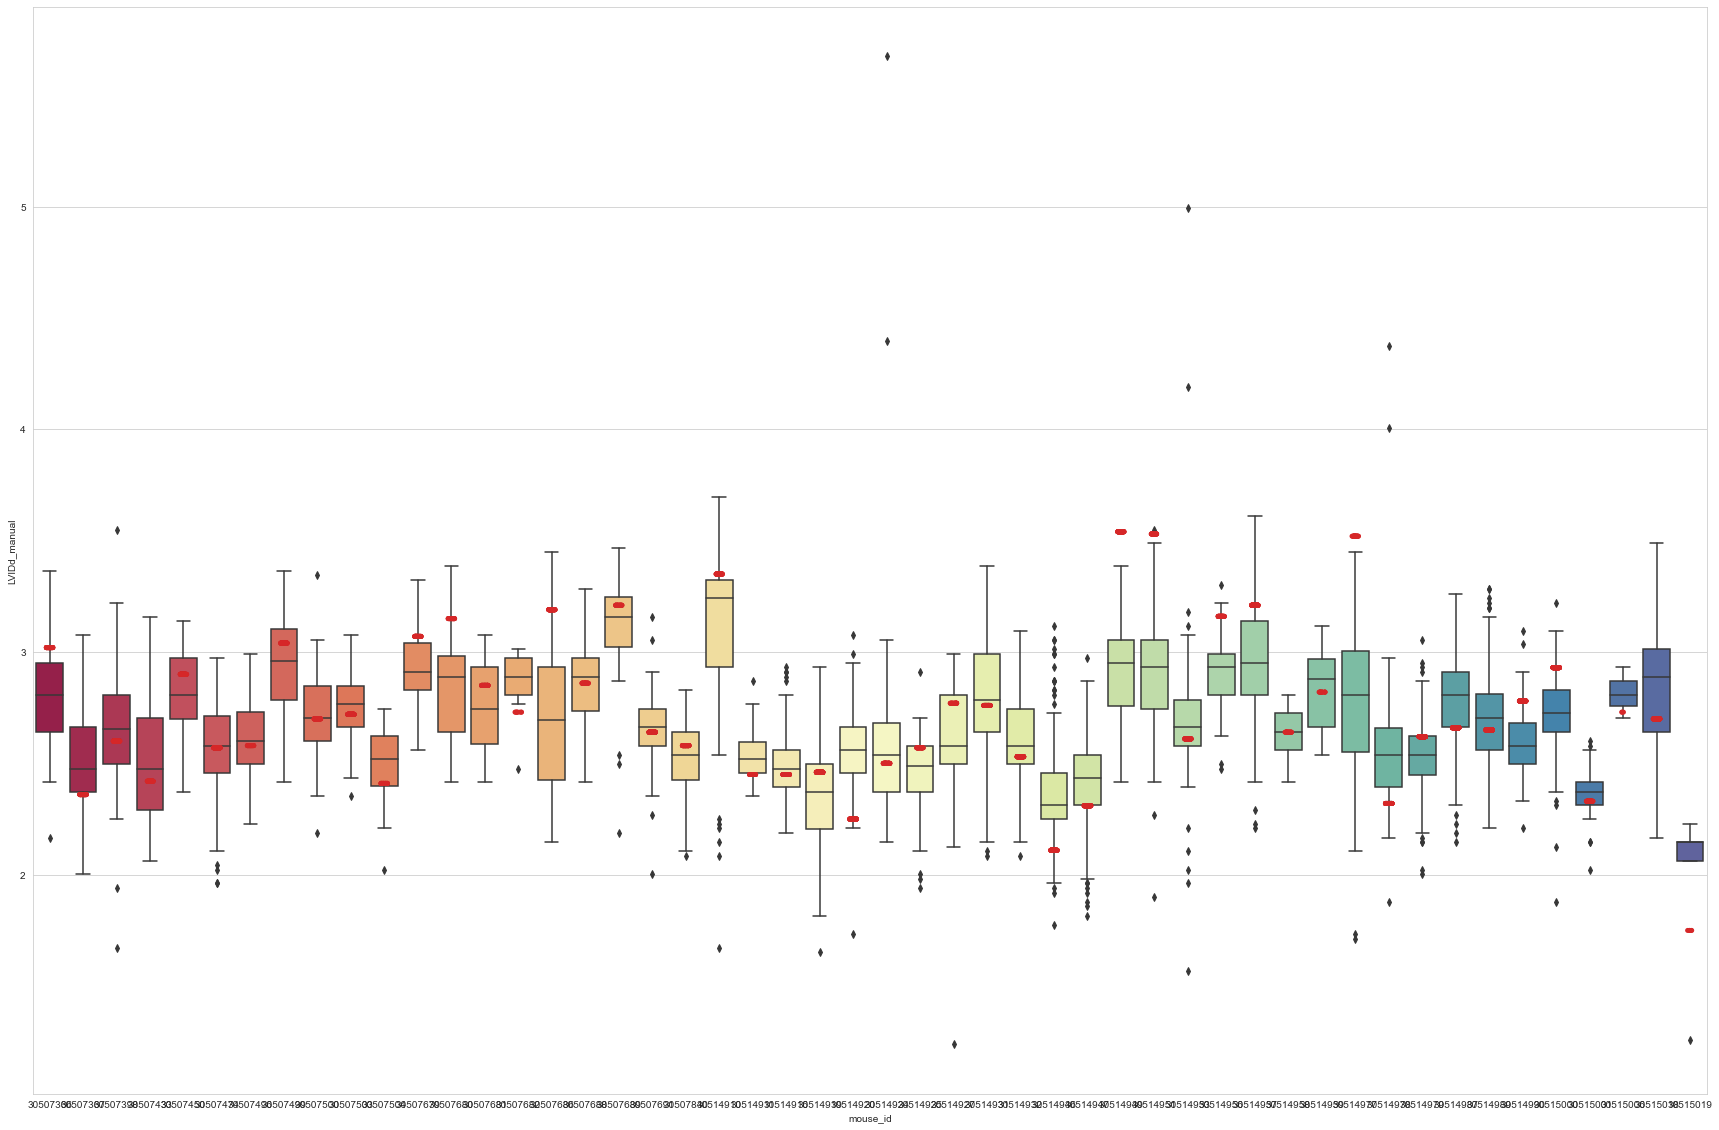

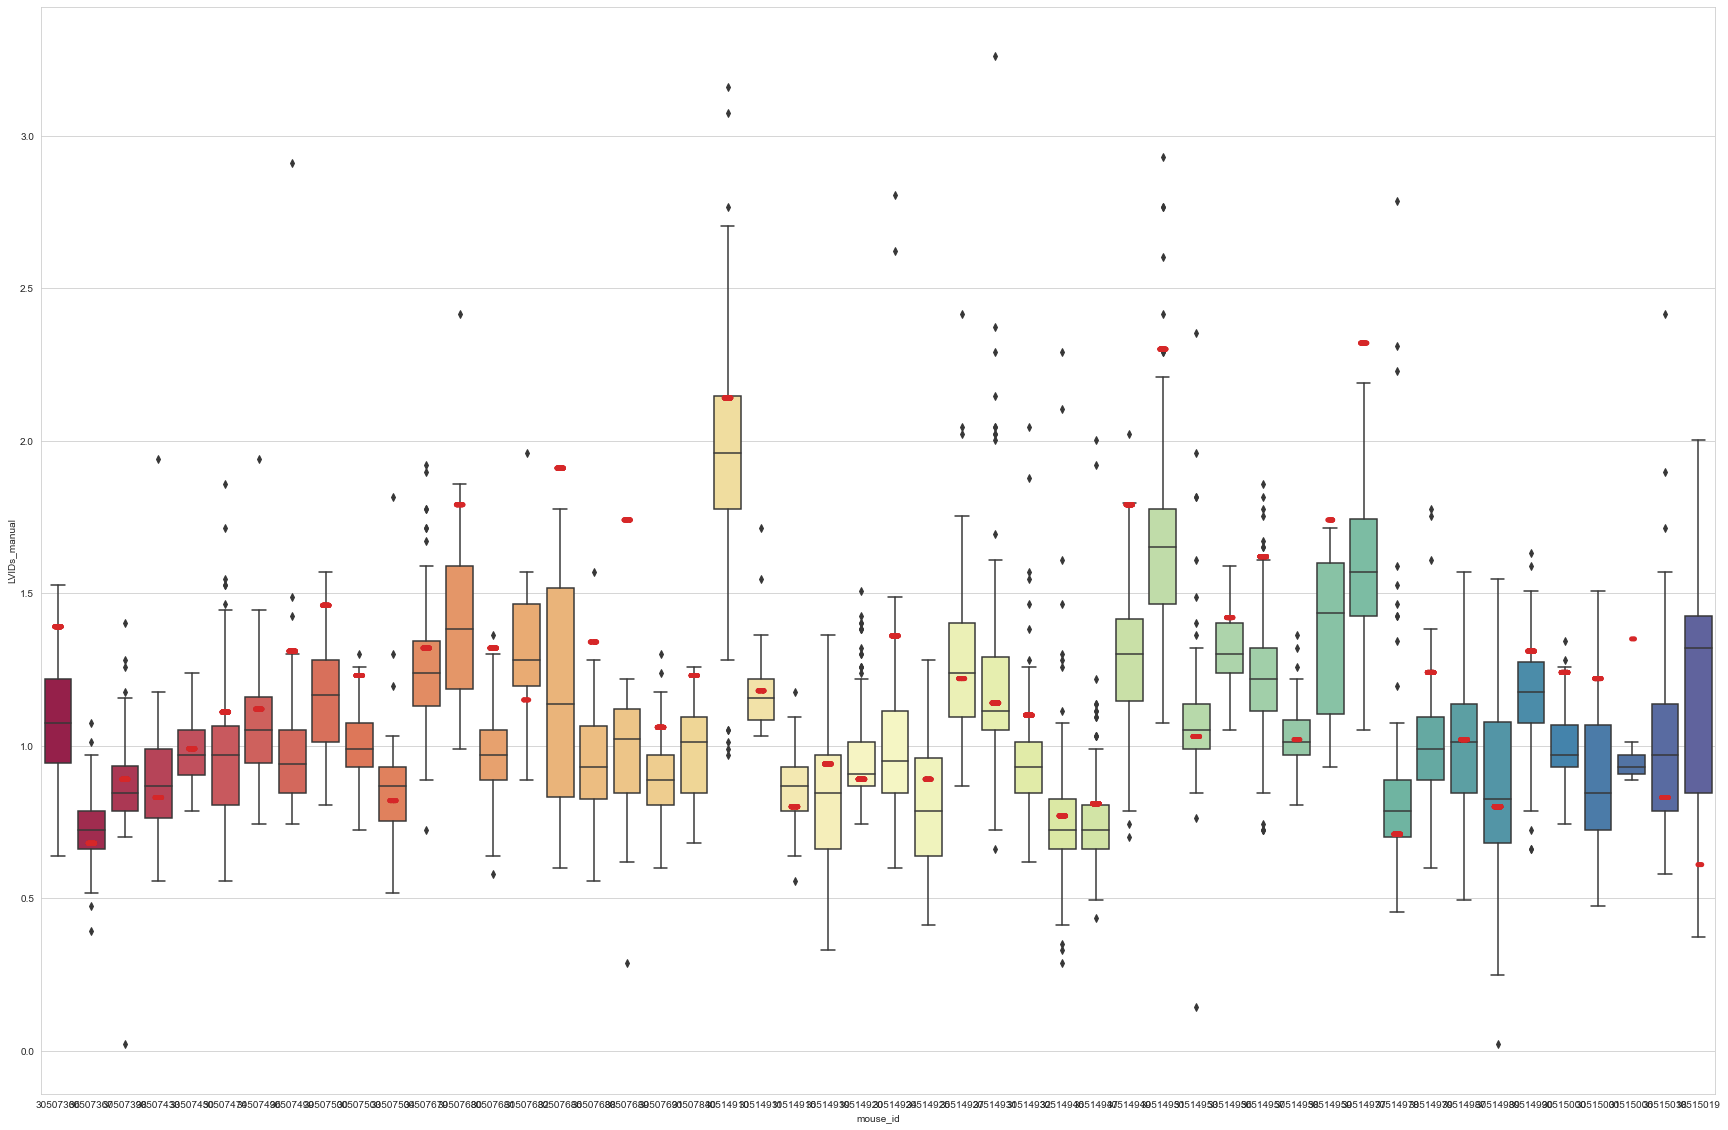

In [9]:
fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDd_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDd_manual", color=colors2)

fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDs_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDs_manual", color=colors2)

### Overview per mouse per parameter

/var/folders/n_/jbljd4tj5n597j4x17mmm_240000gp/T/ipykernel_80078/1900006949.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.subplots(figsize= (10,10))


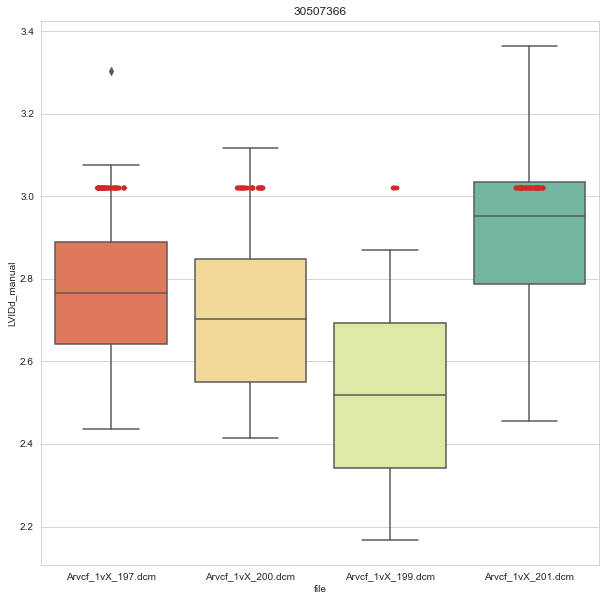

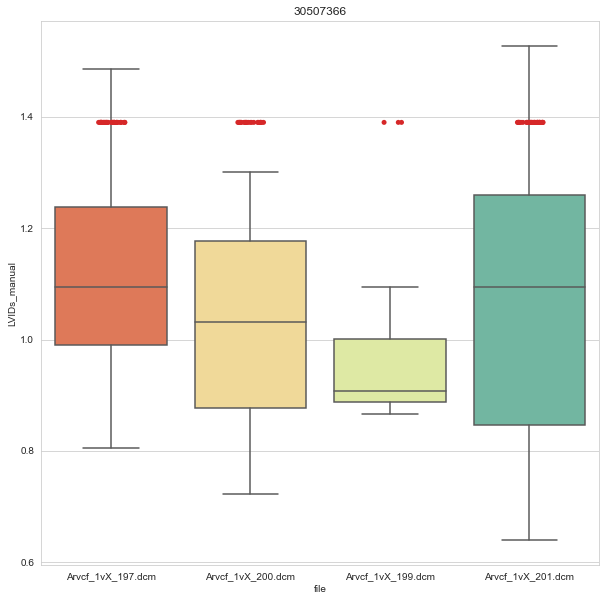

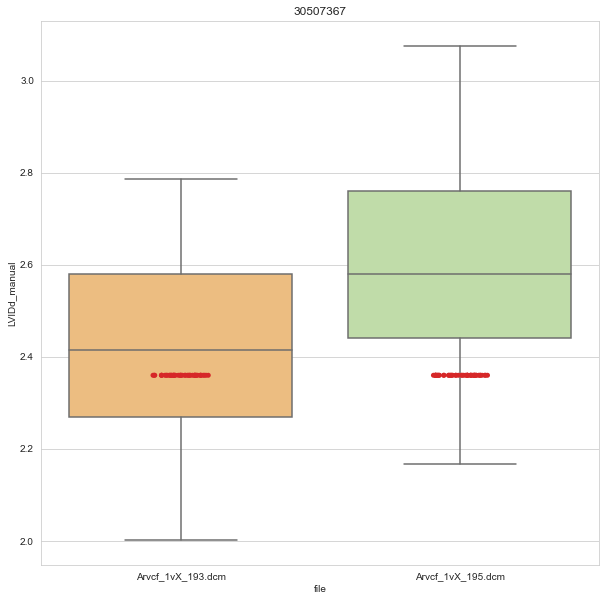

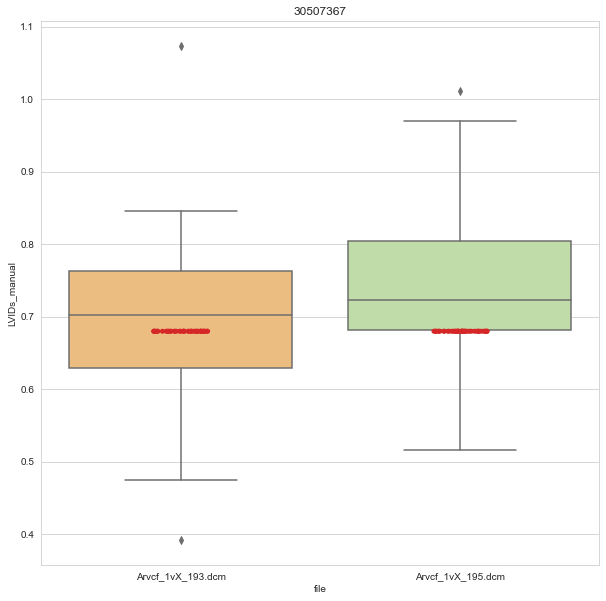

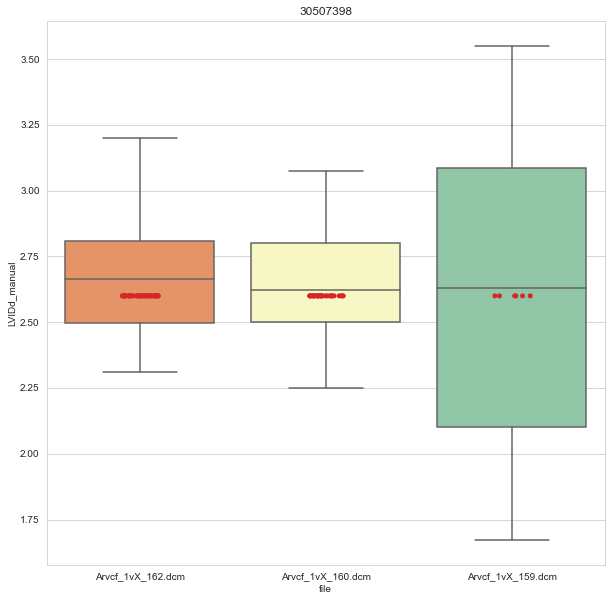

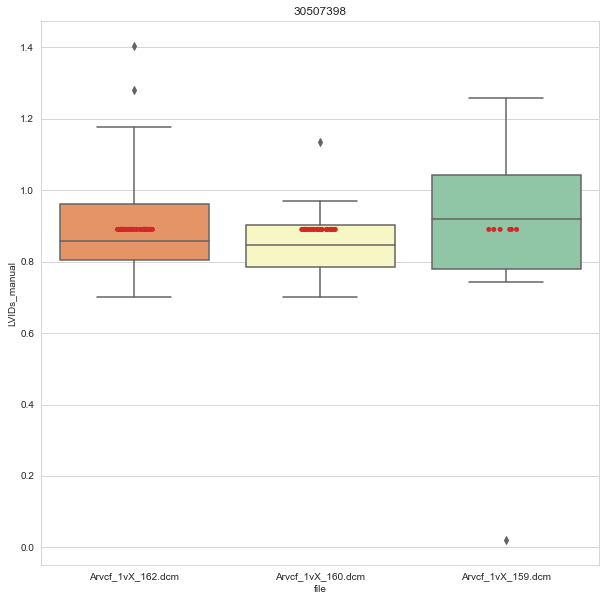

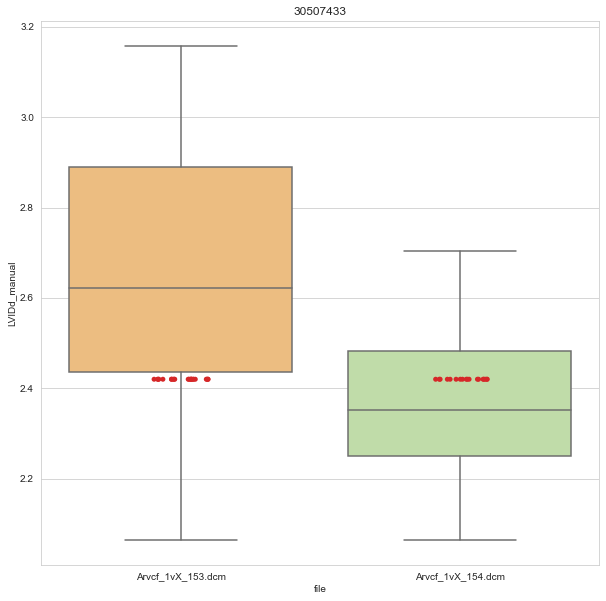

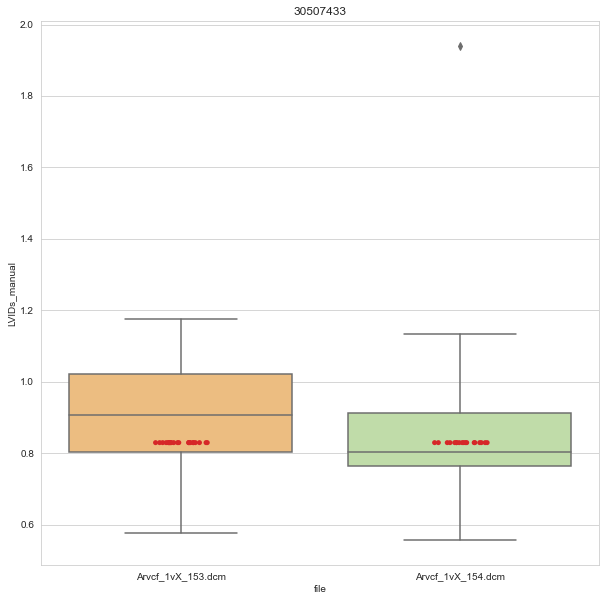

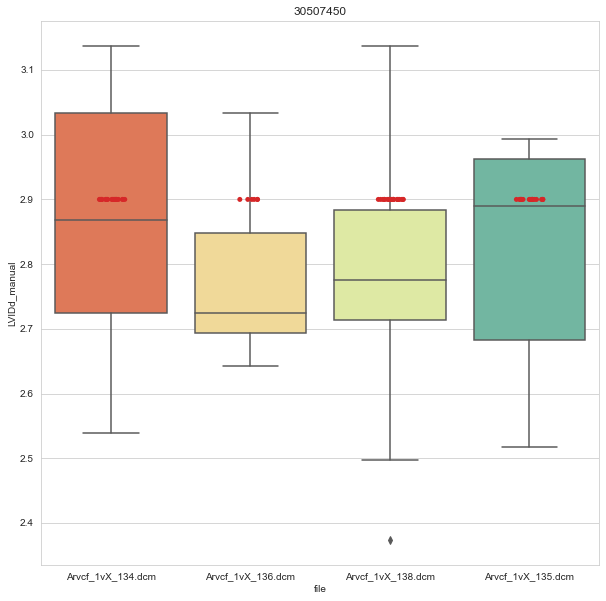

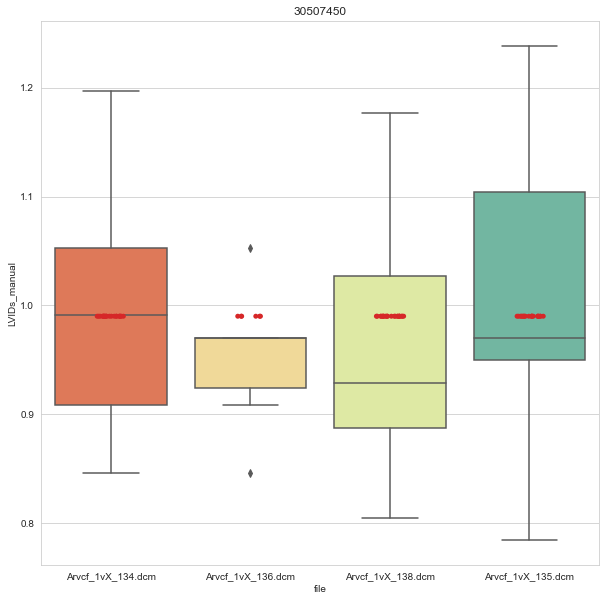

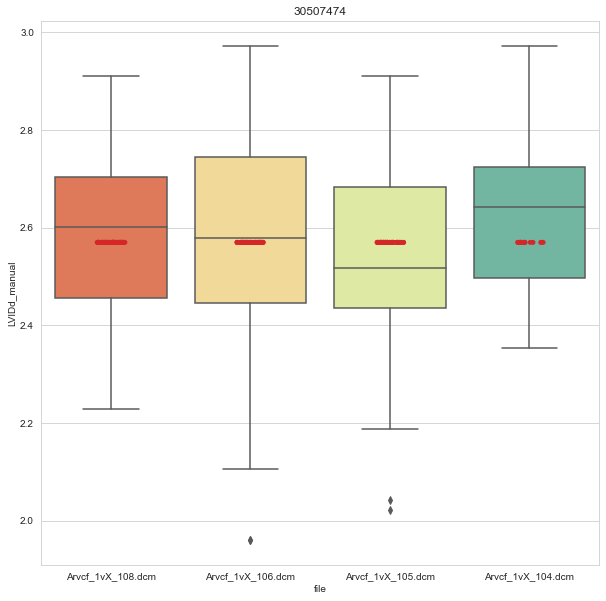

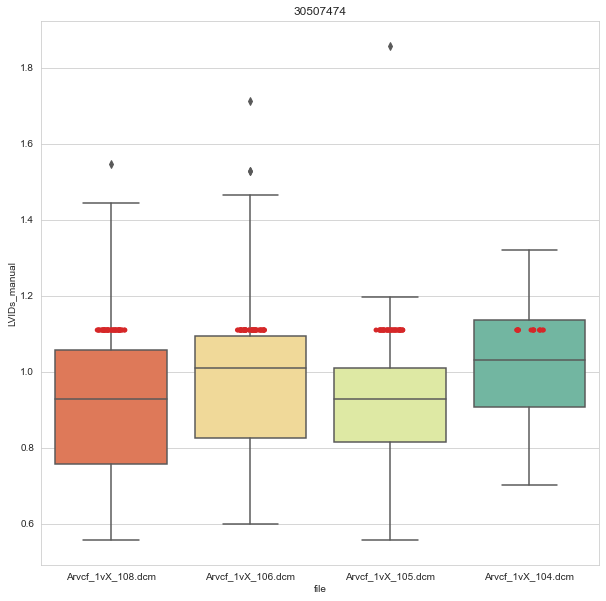

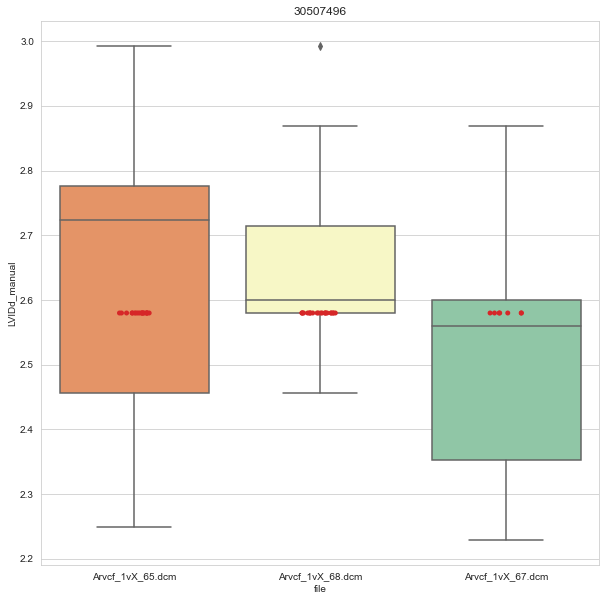

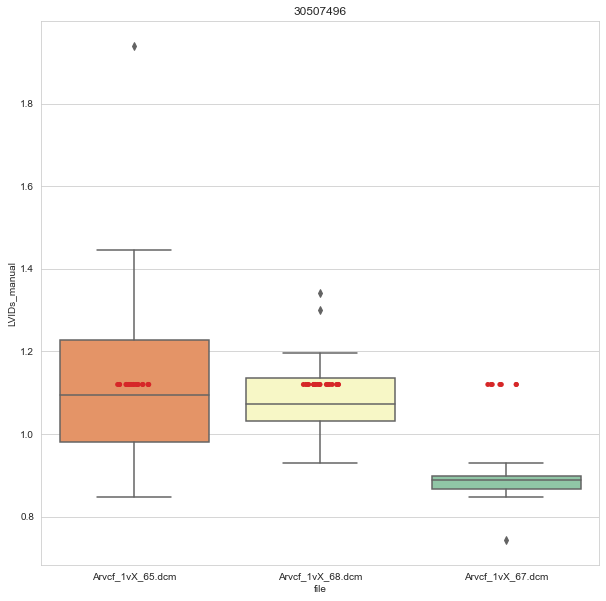

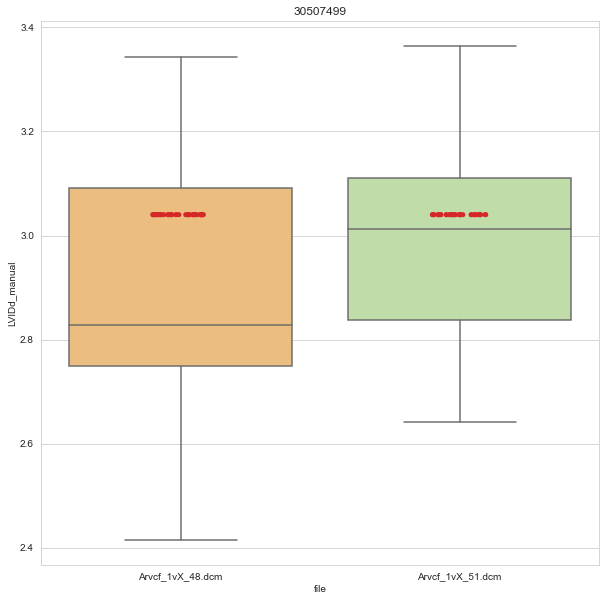

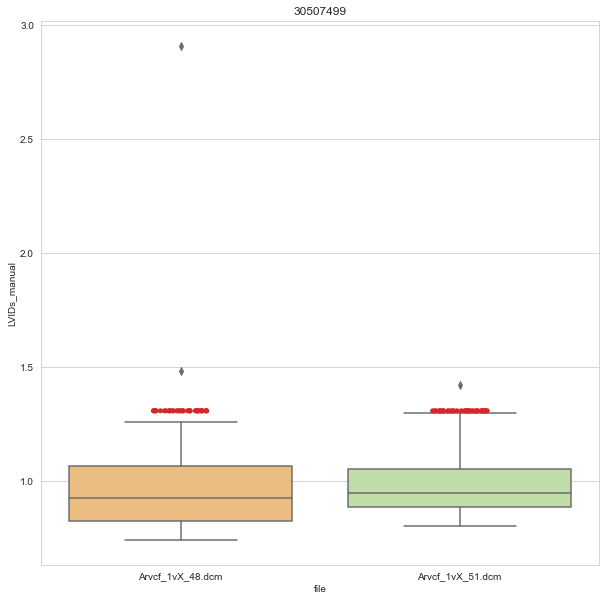

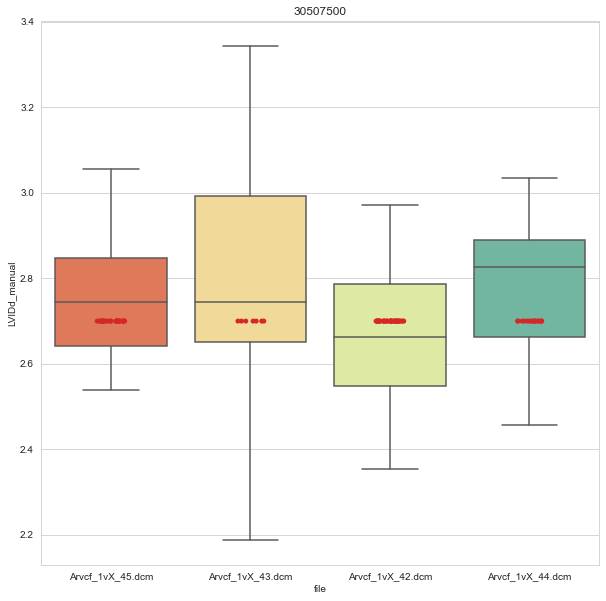

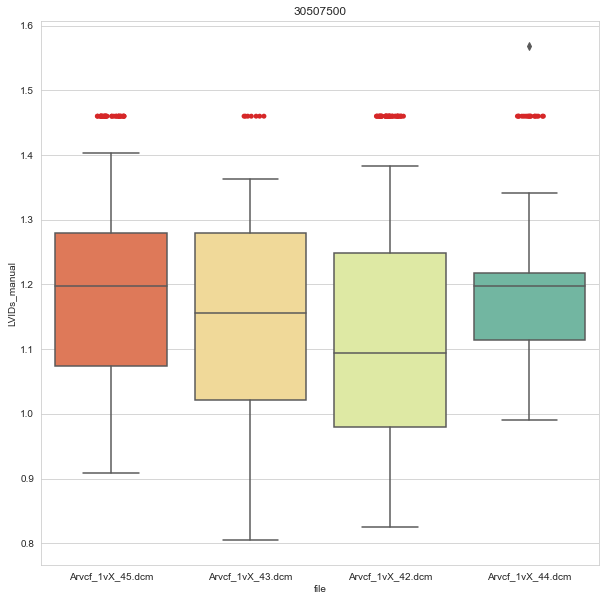

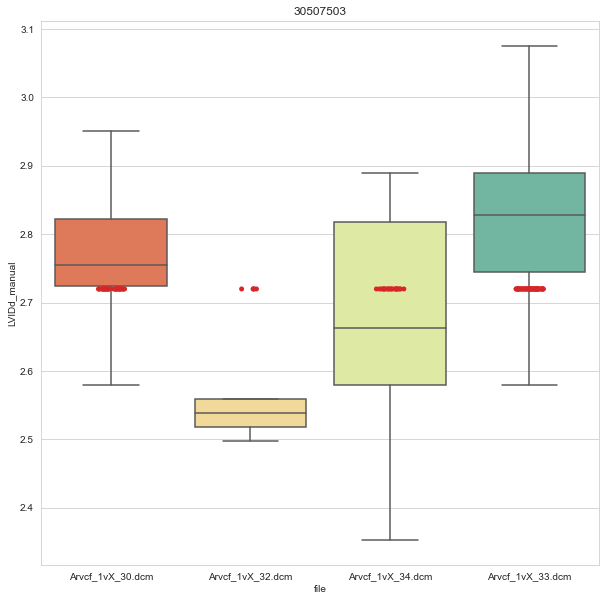

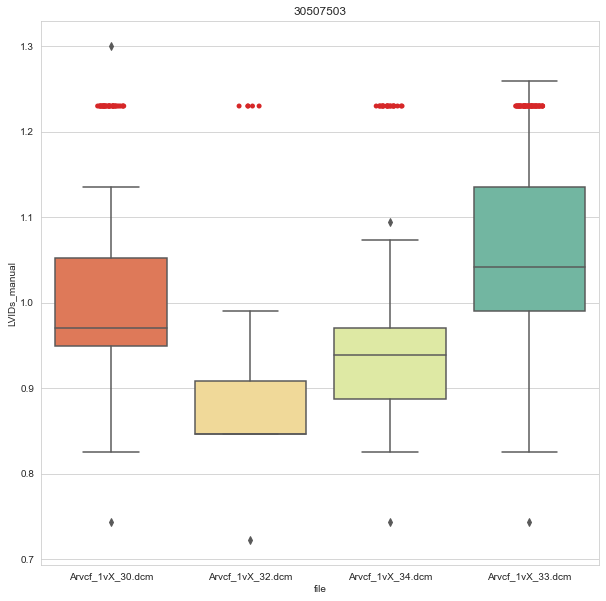

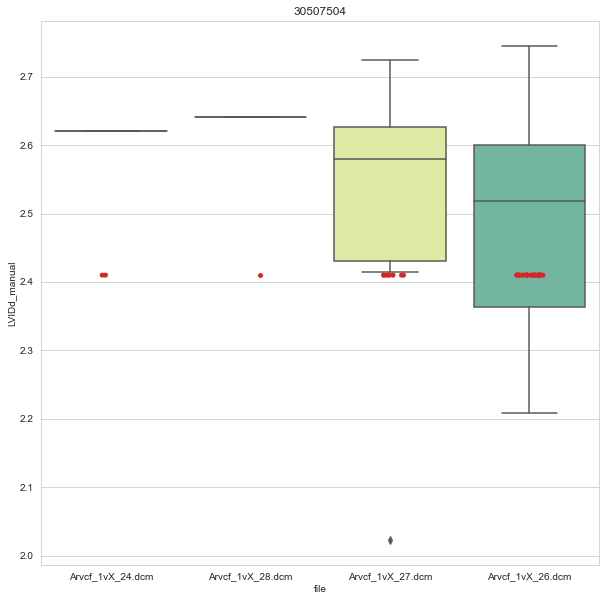

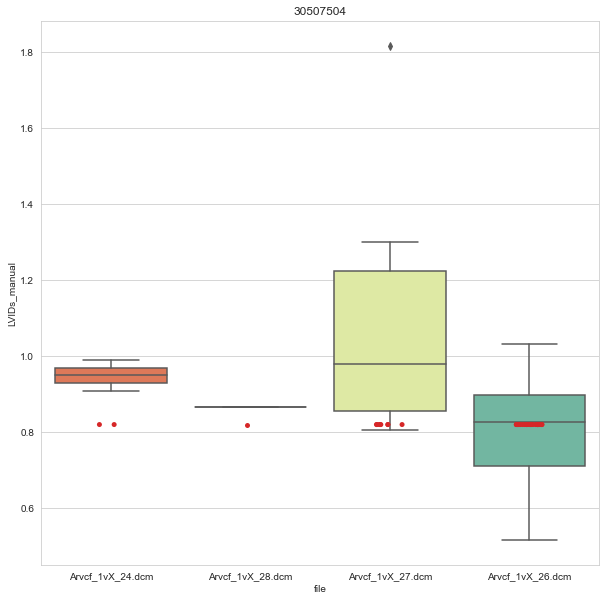

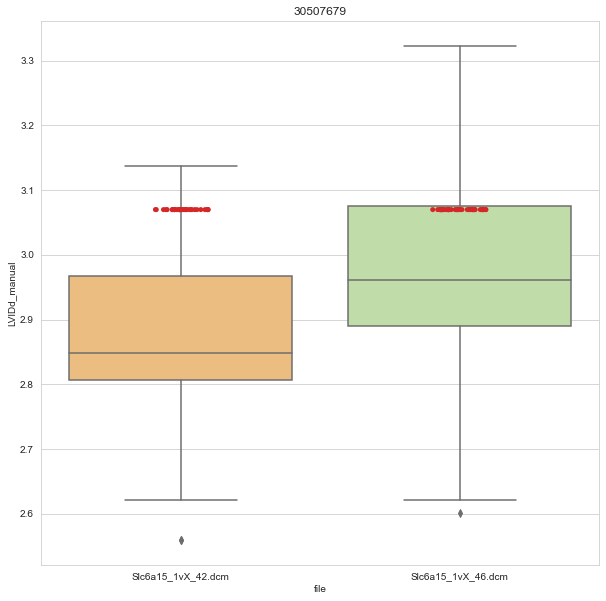

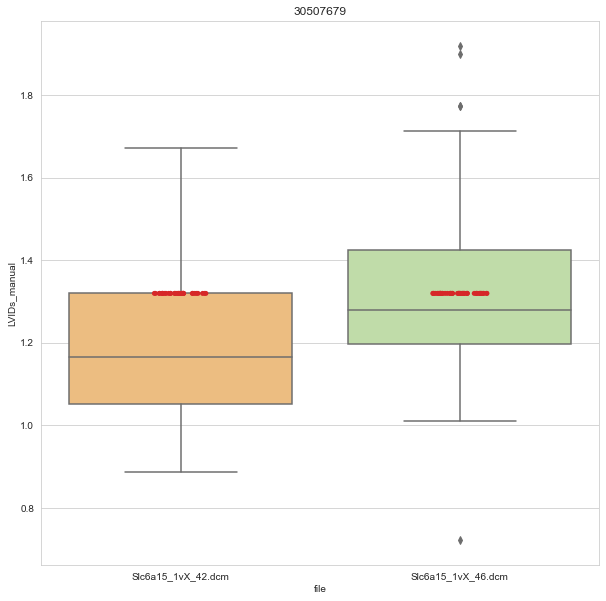

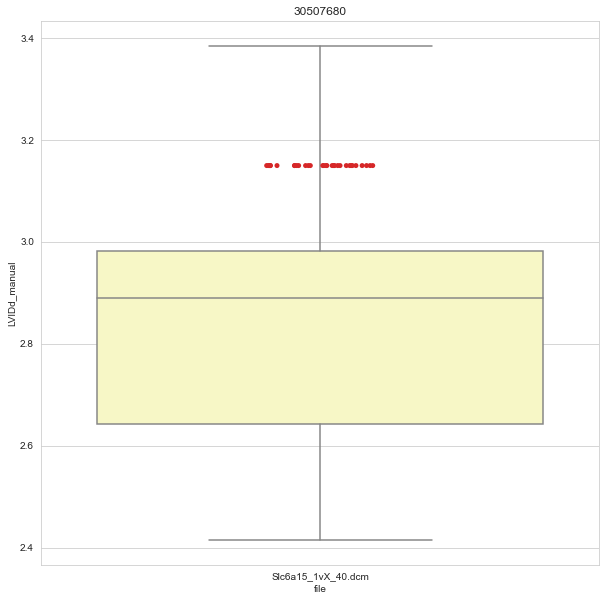

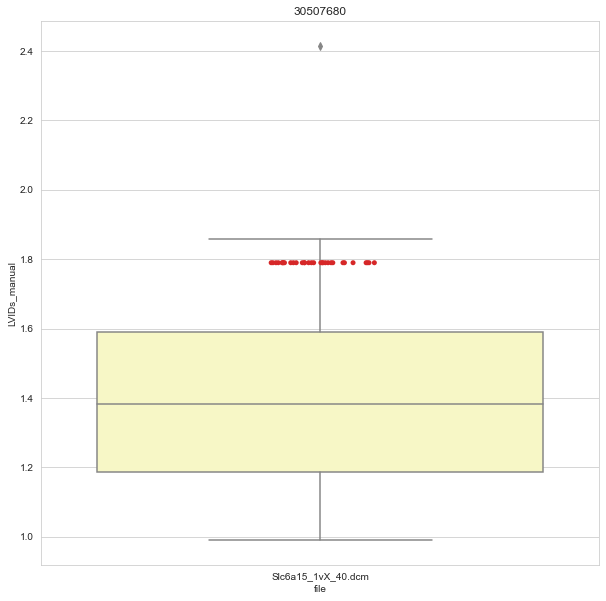

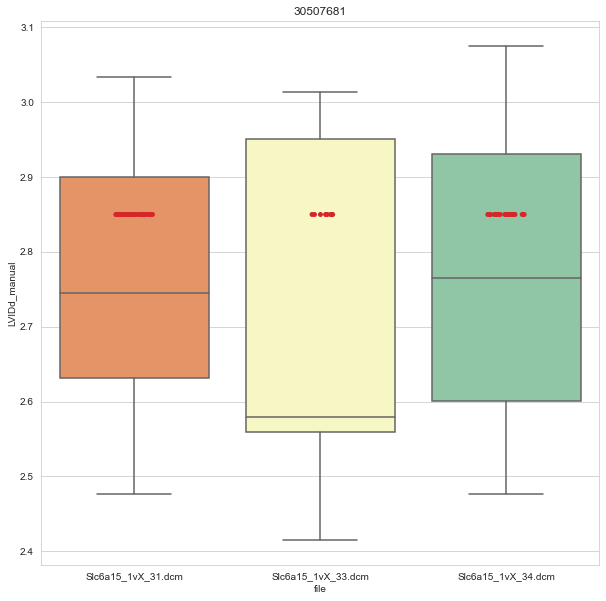

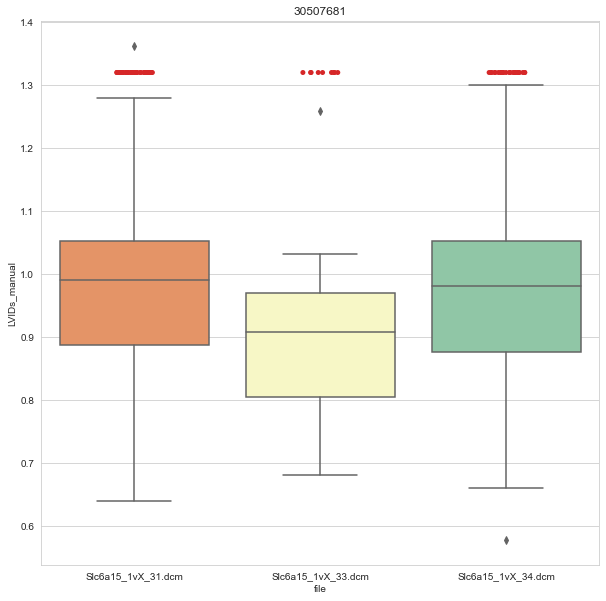

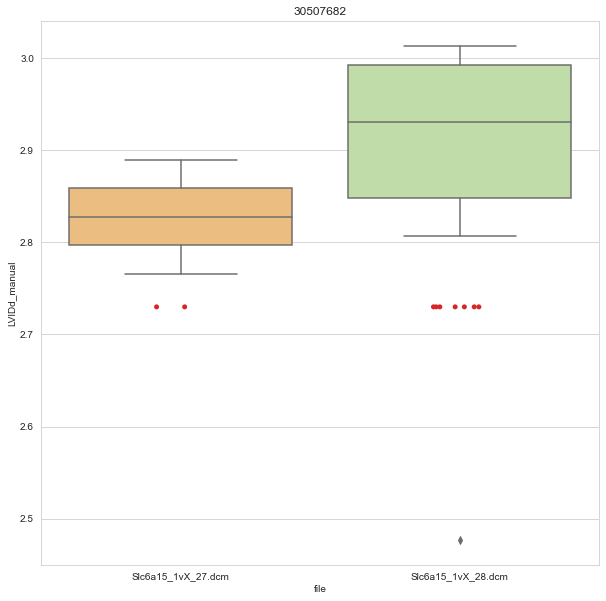

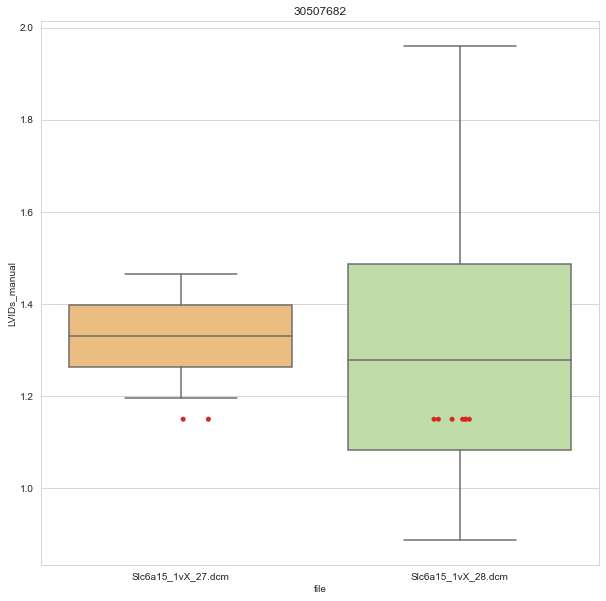

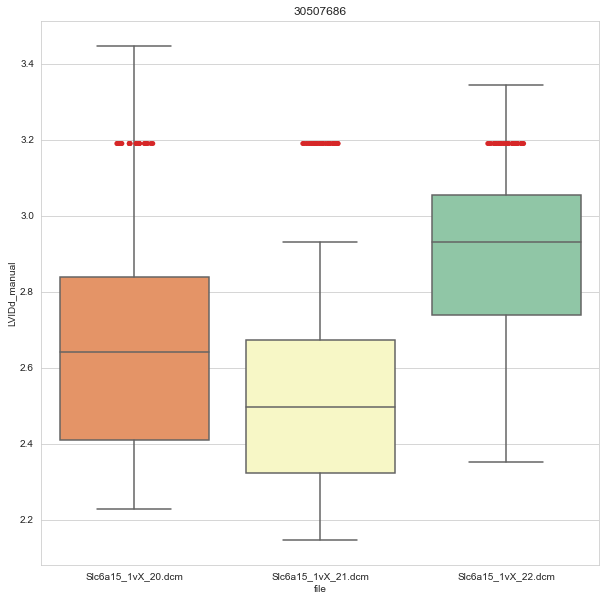

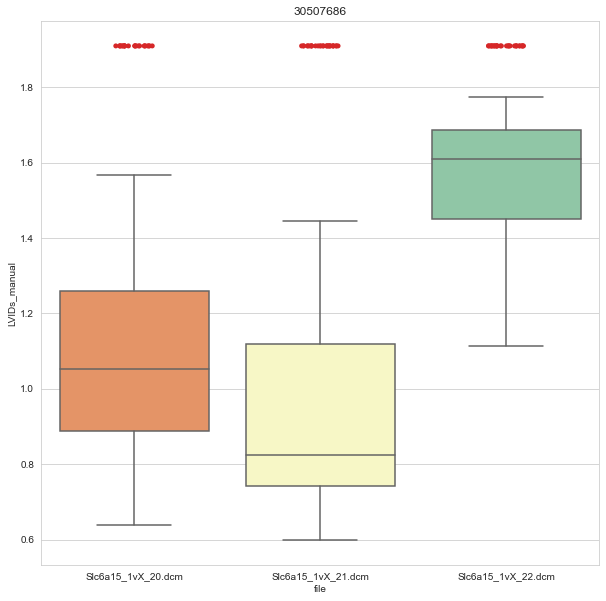

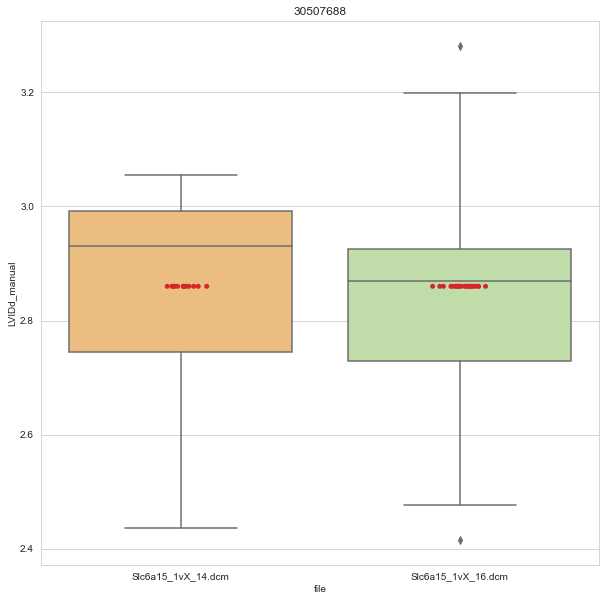

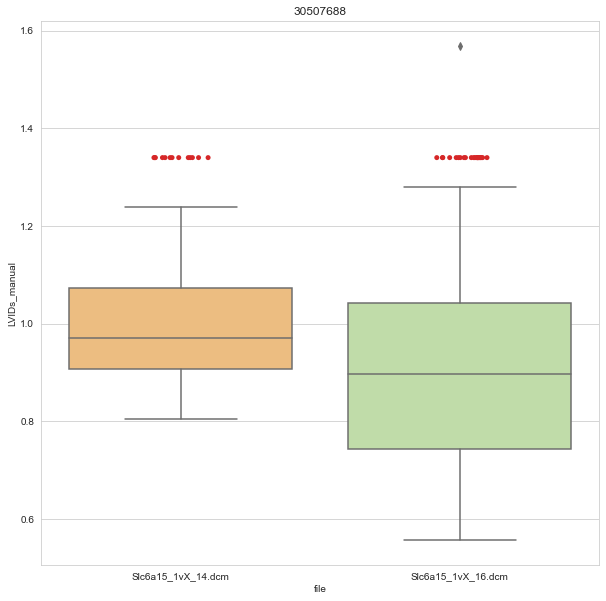

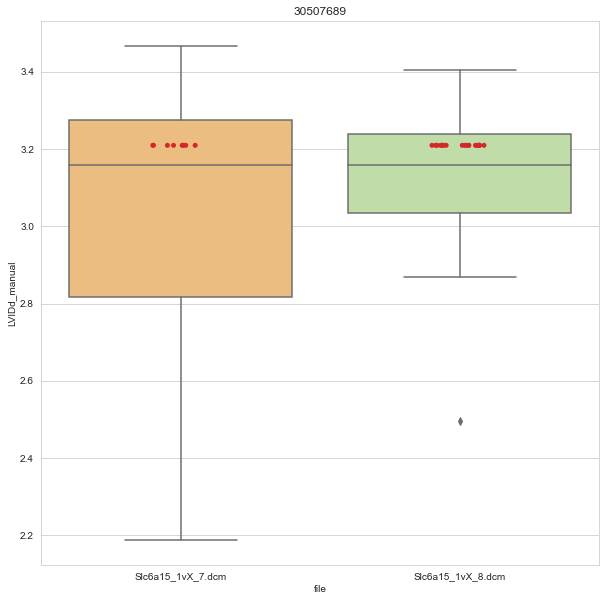

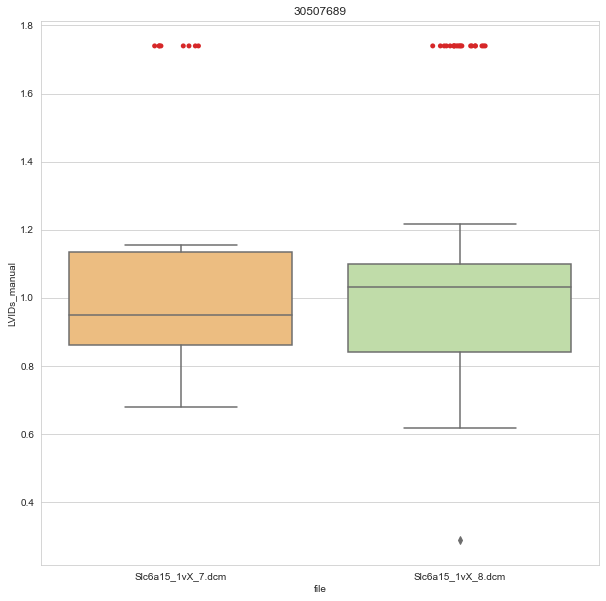

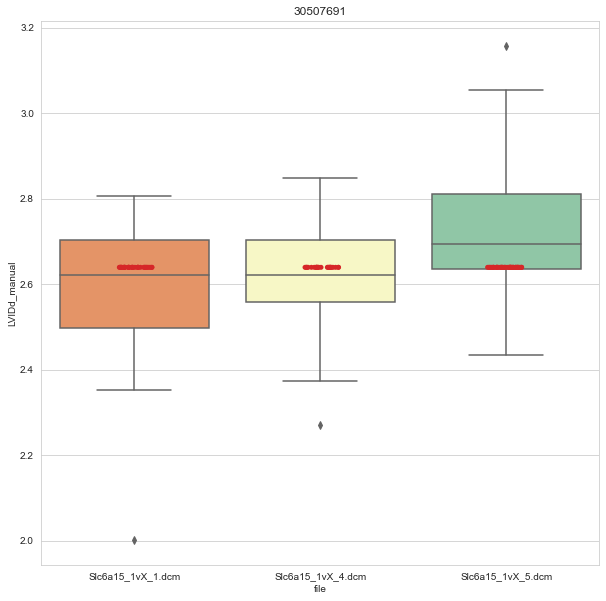

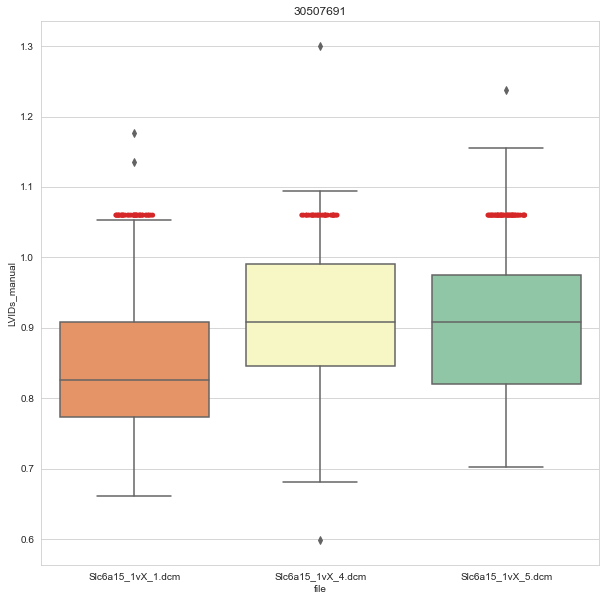

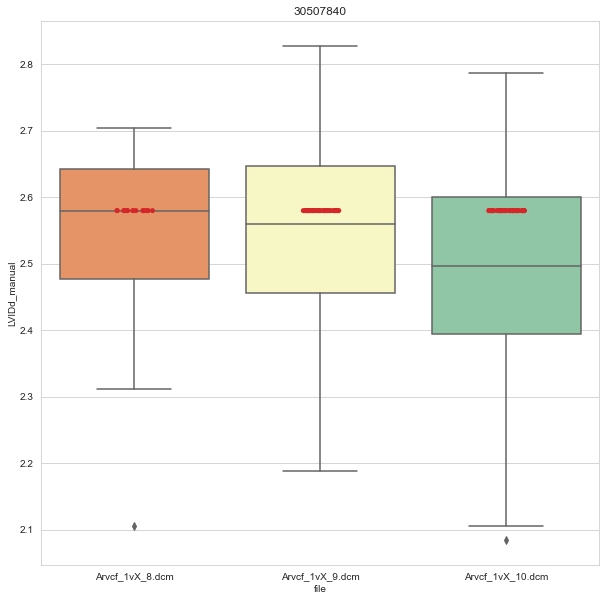

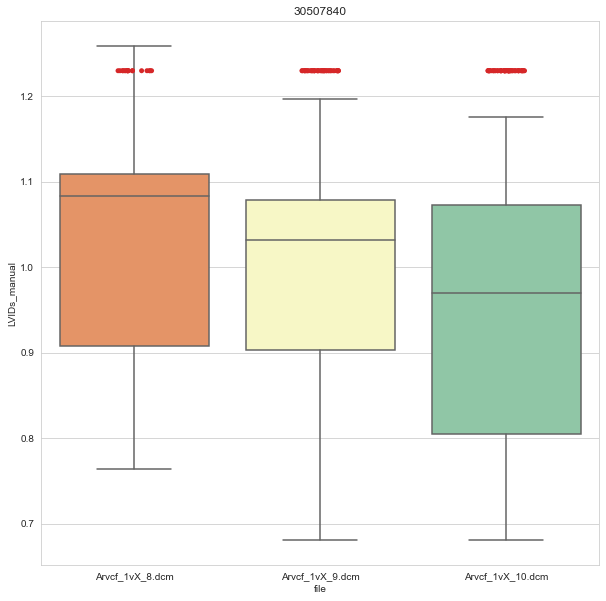

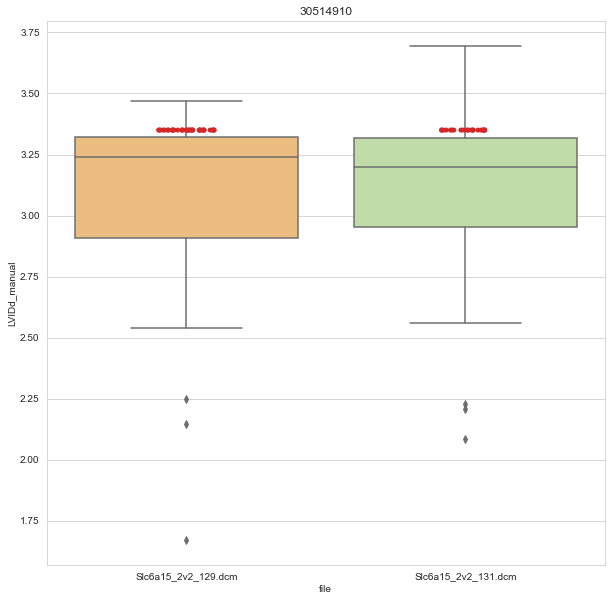

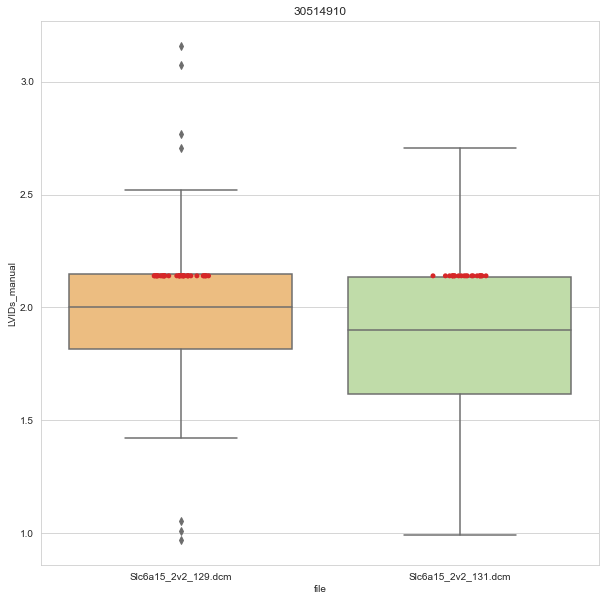

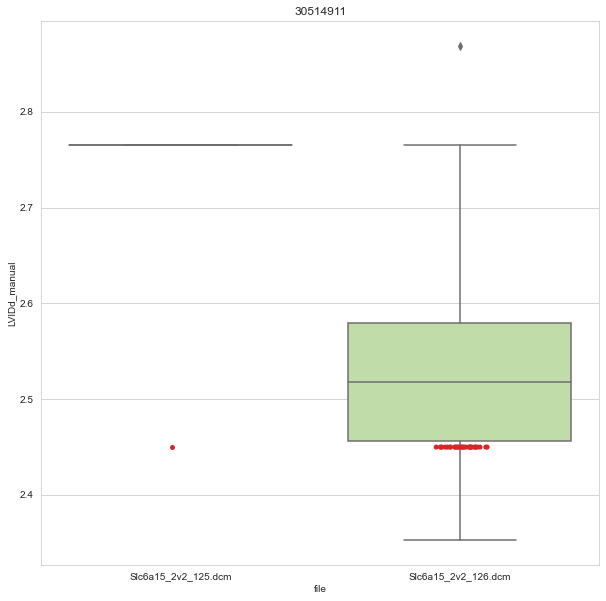

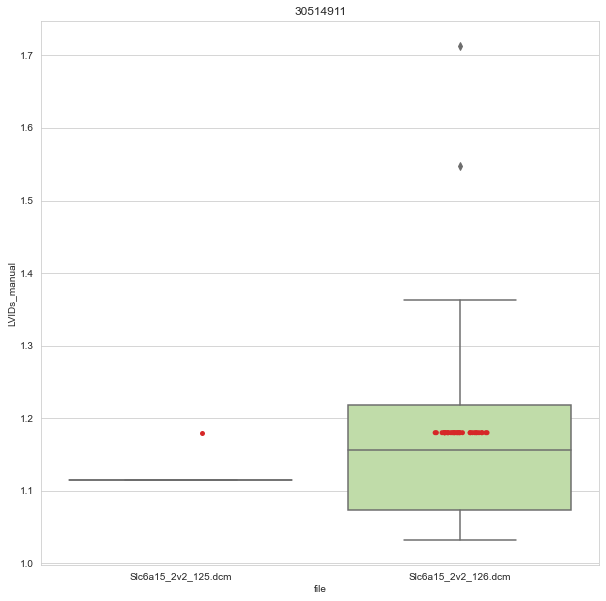

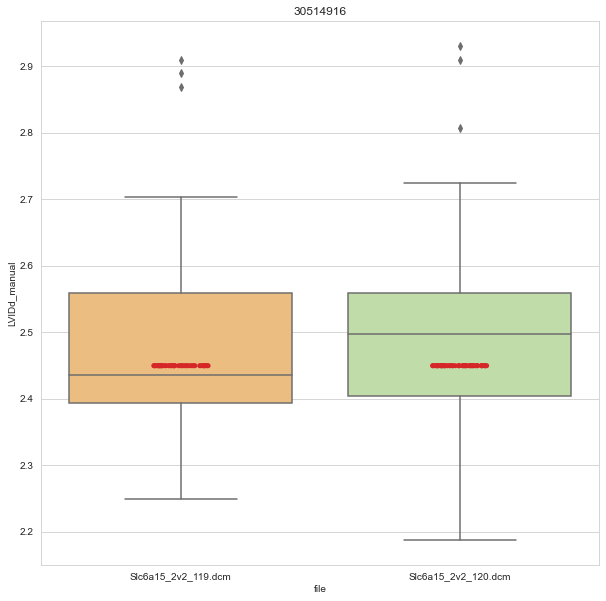

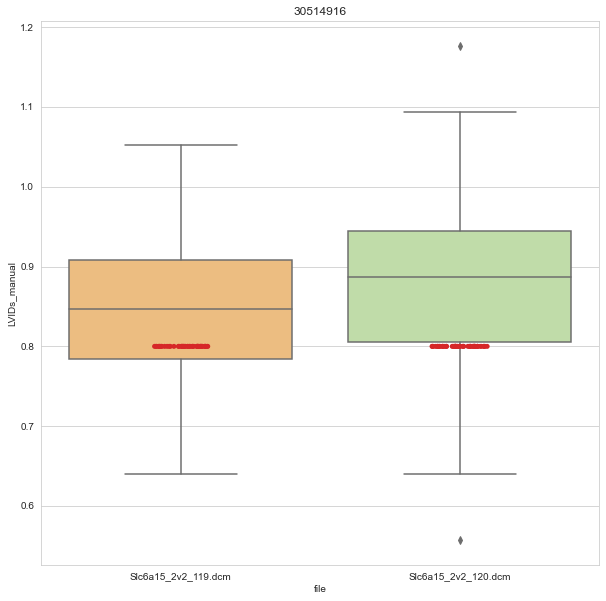

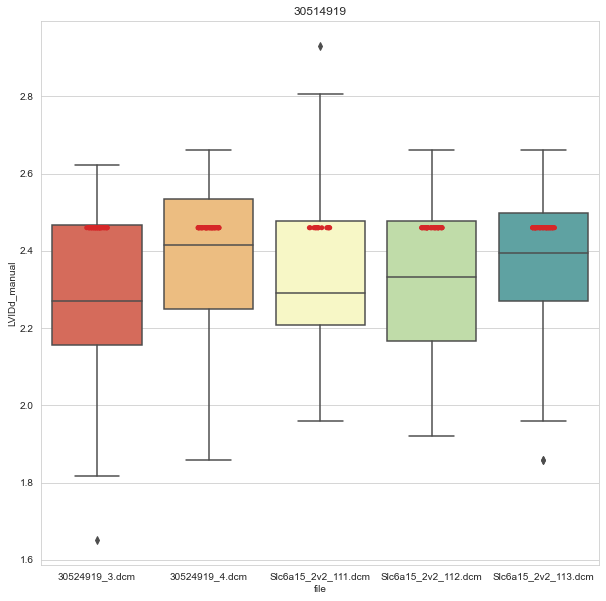

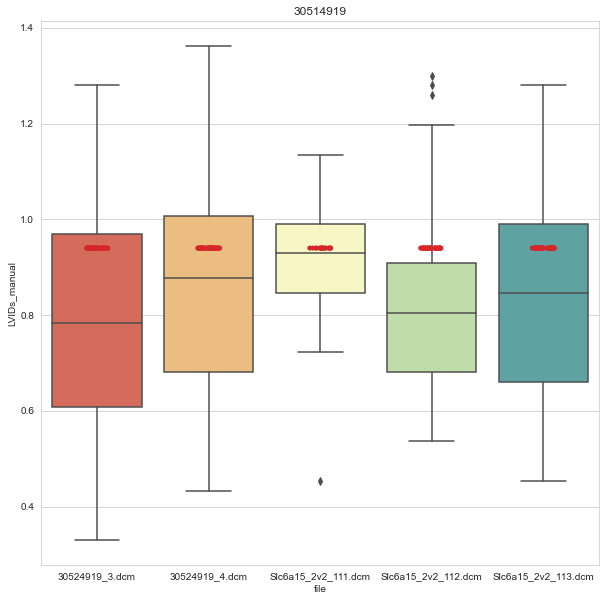

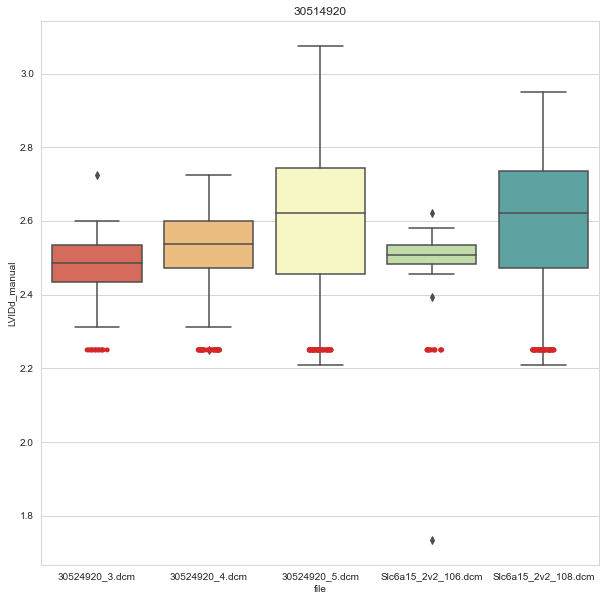

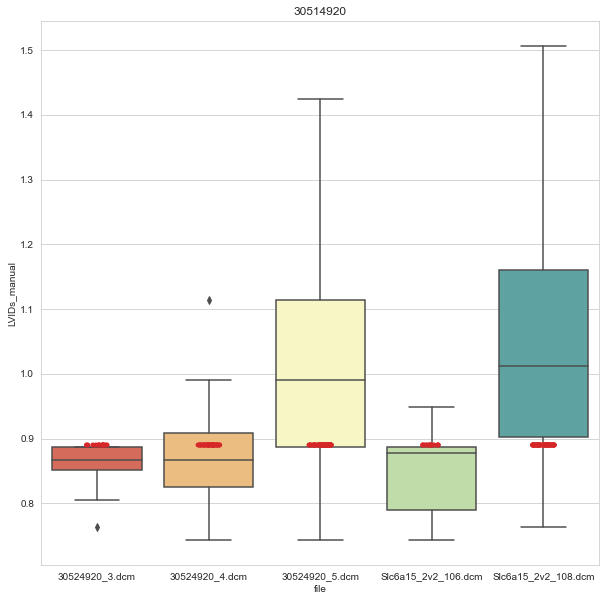

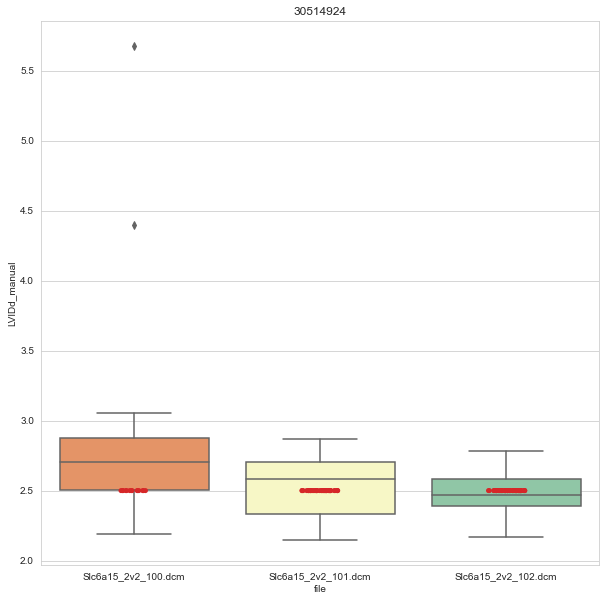

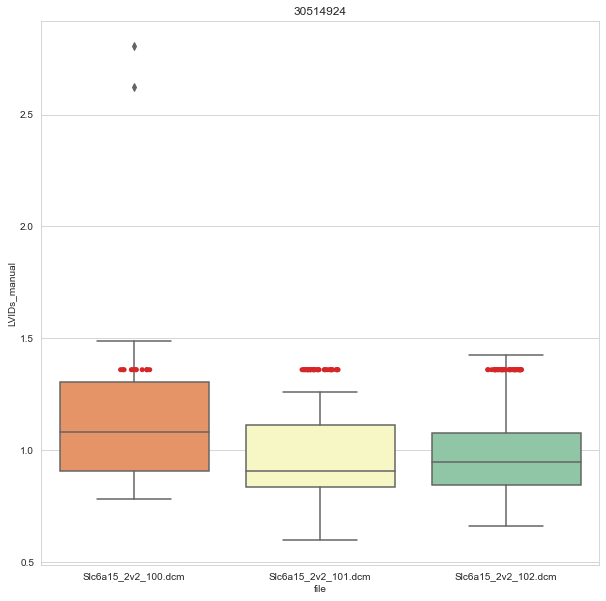

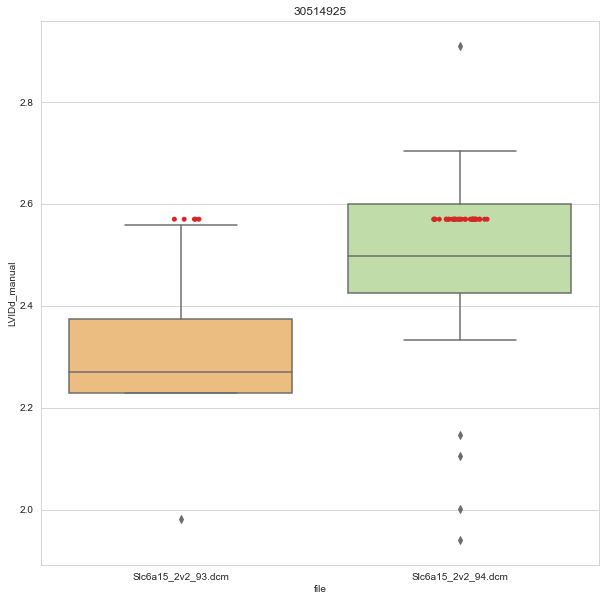

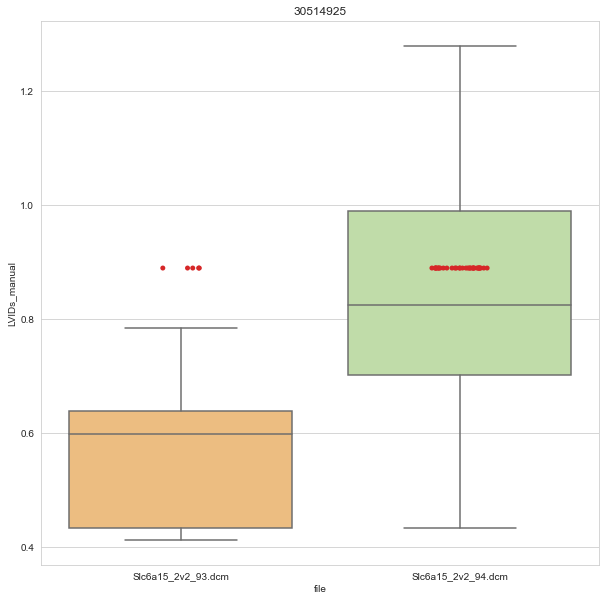

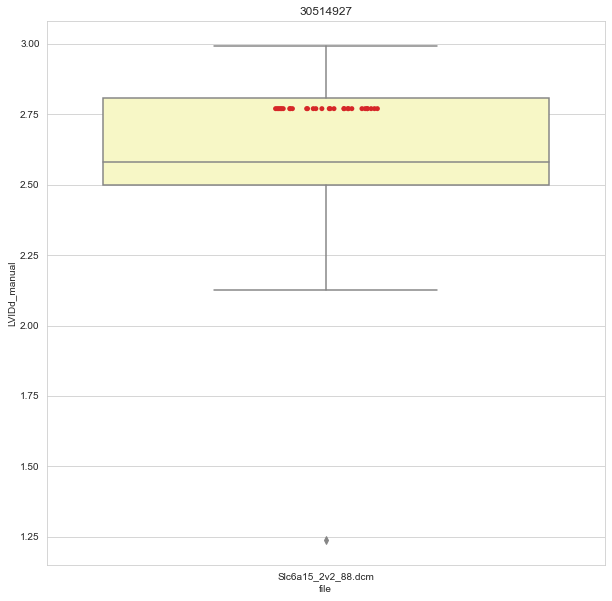

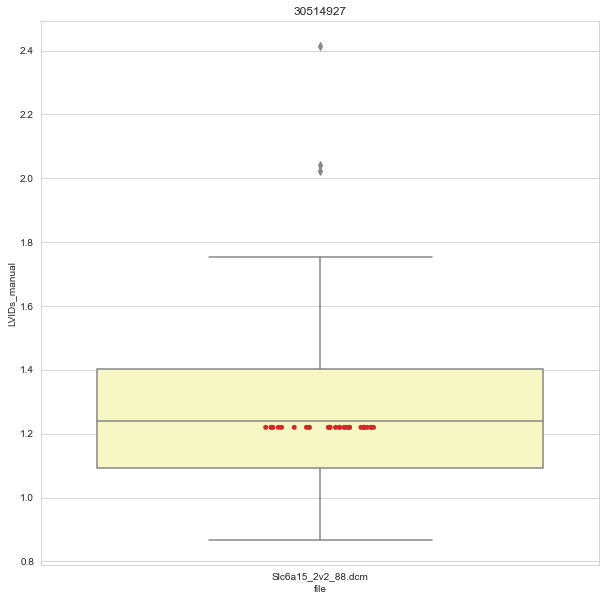

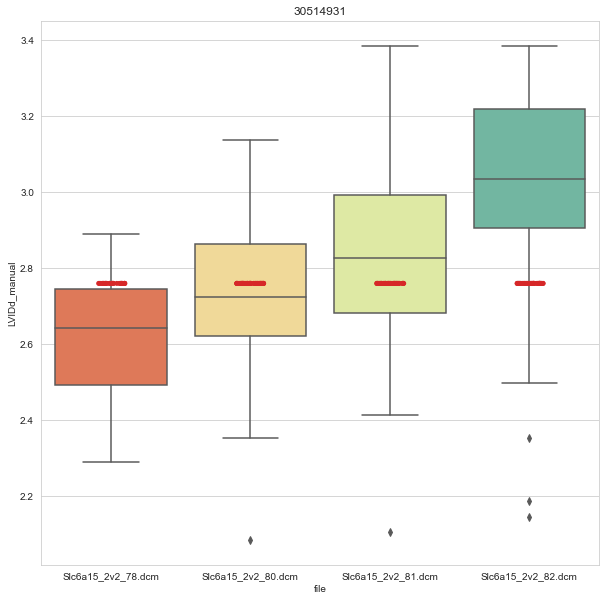

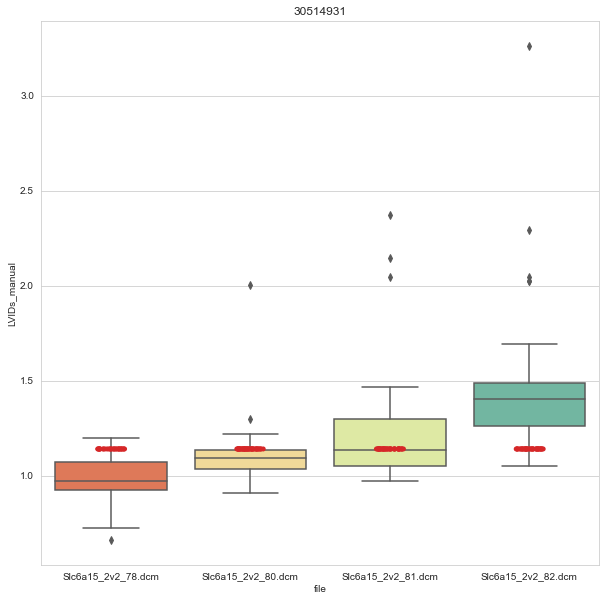

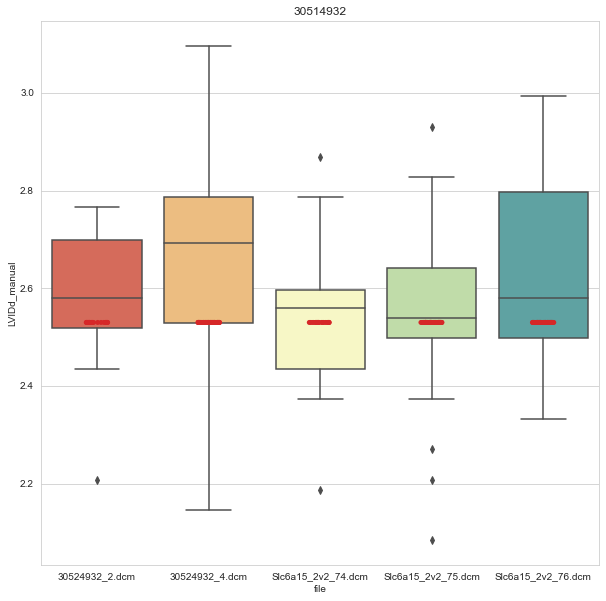

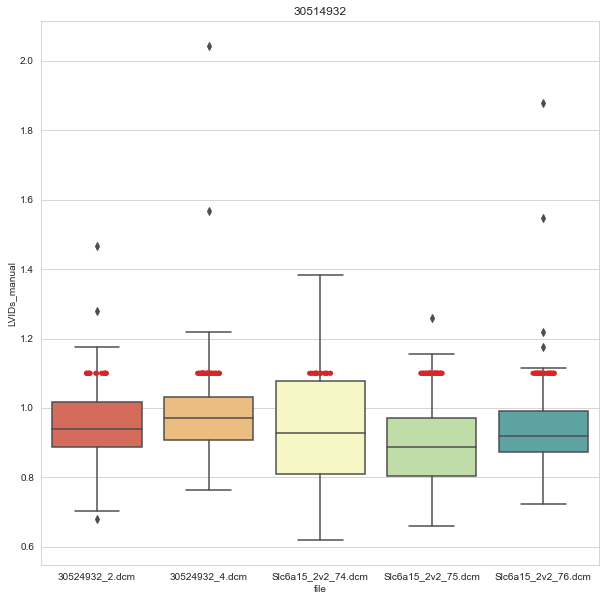

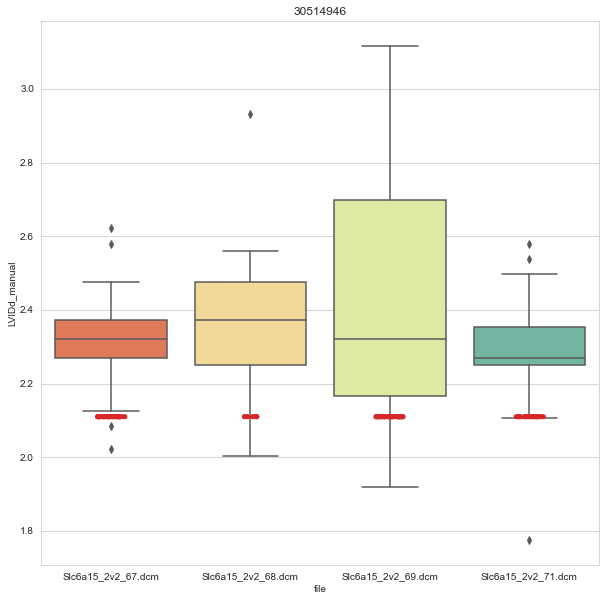

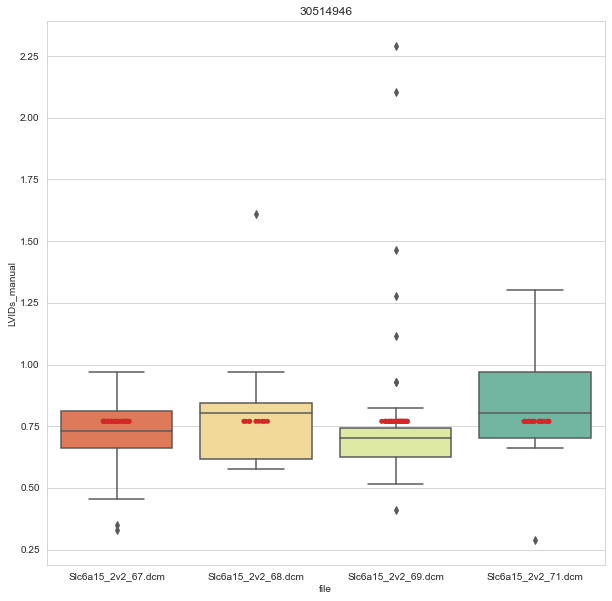

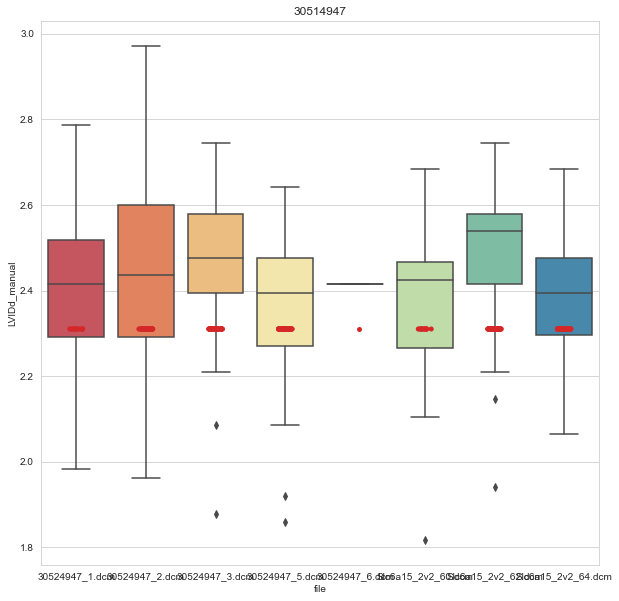

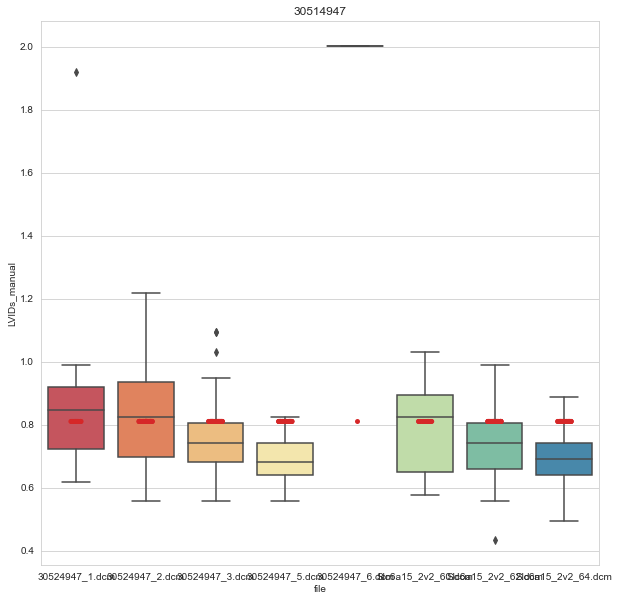

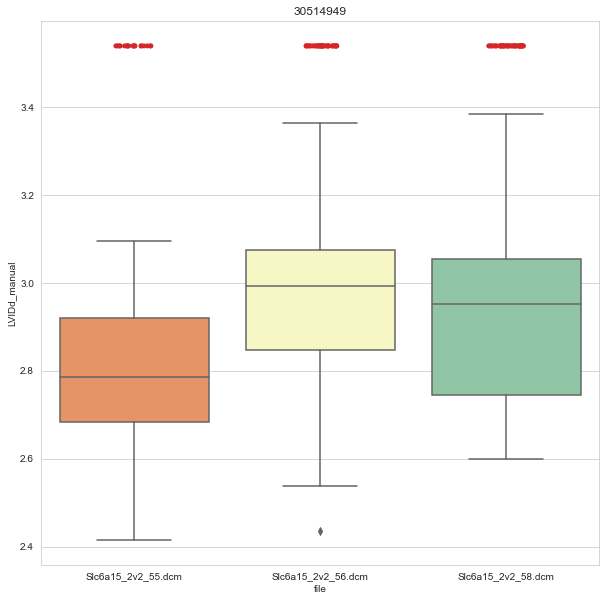

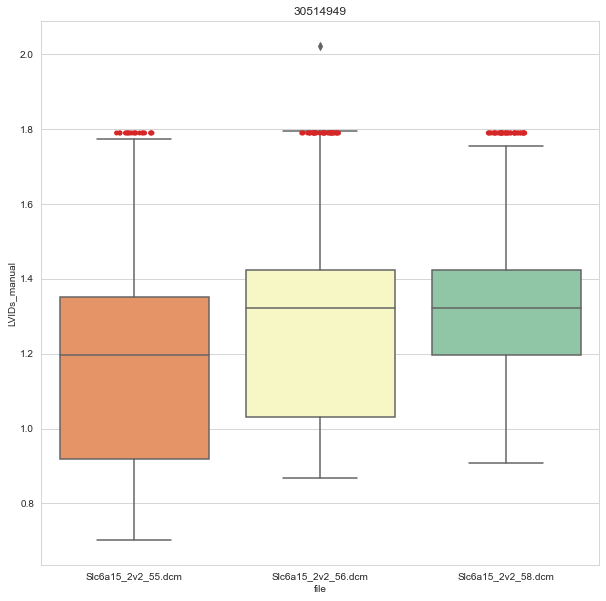

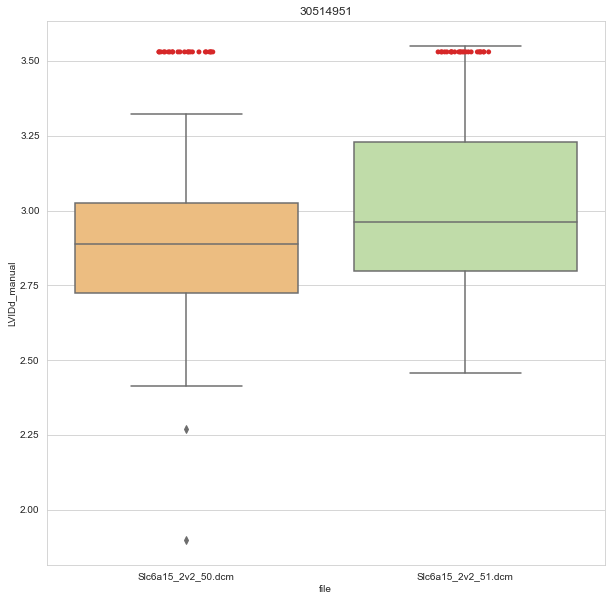

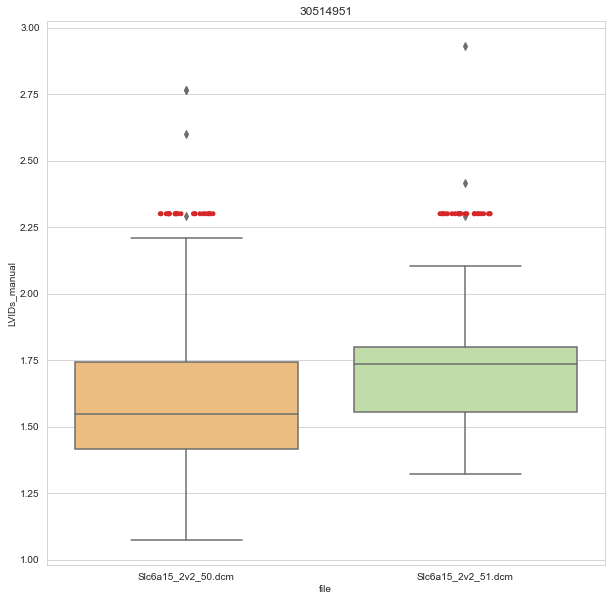

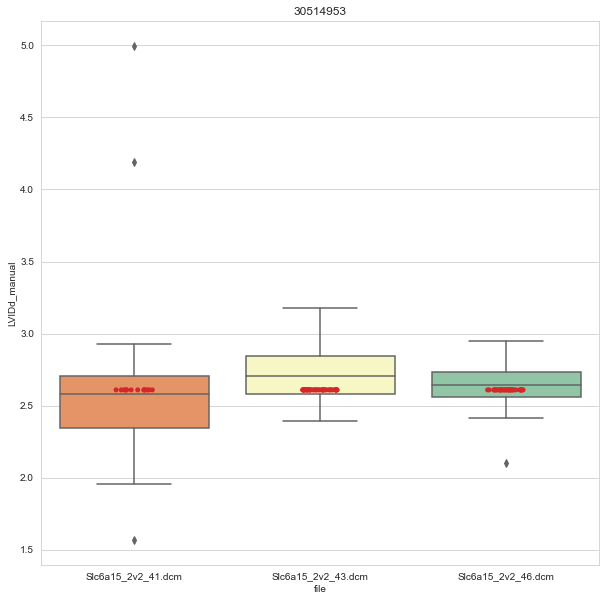

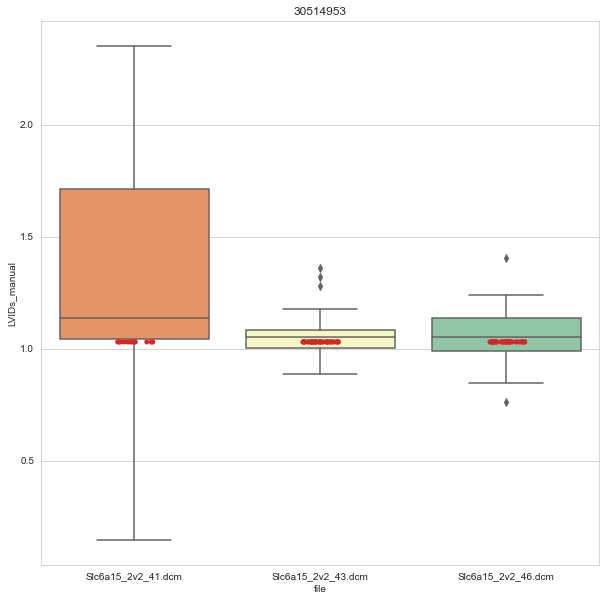

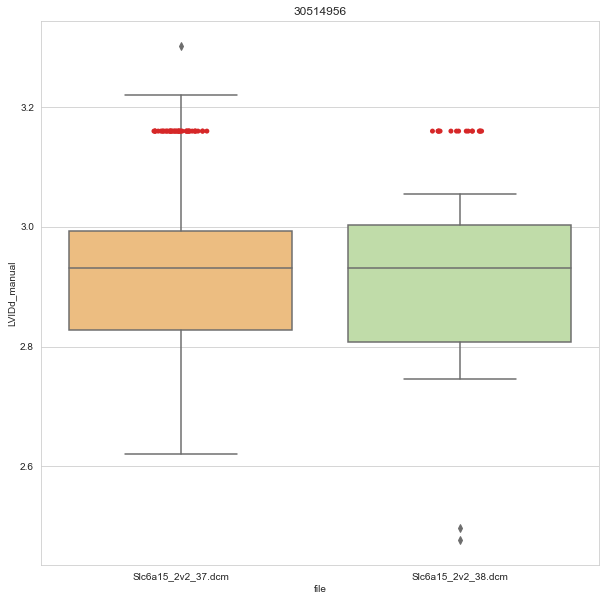

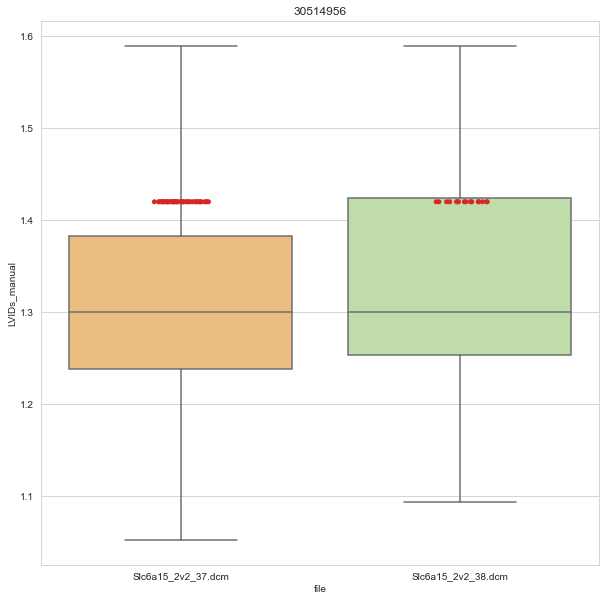

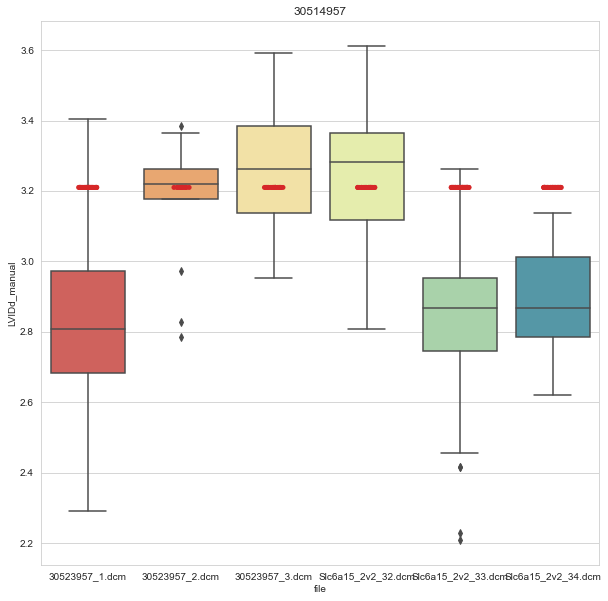

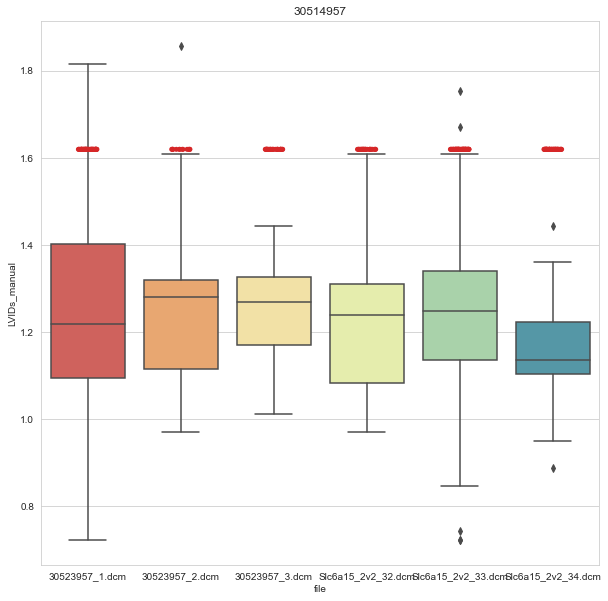

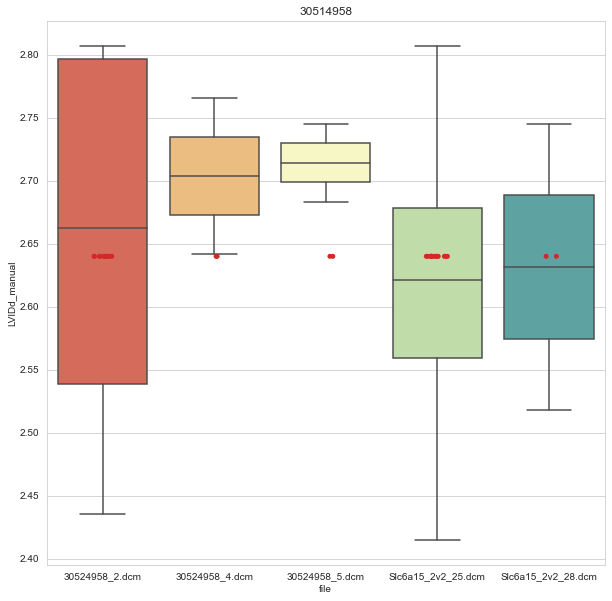

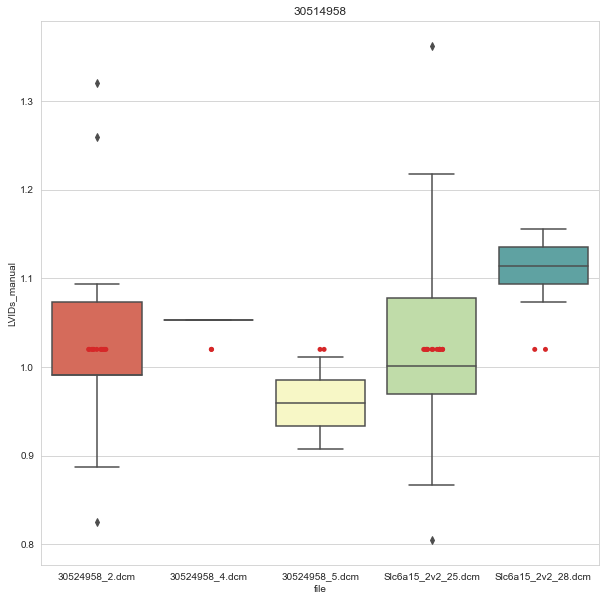

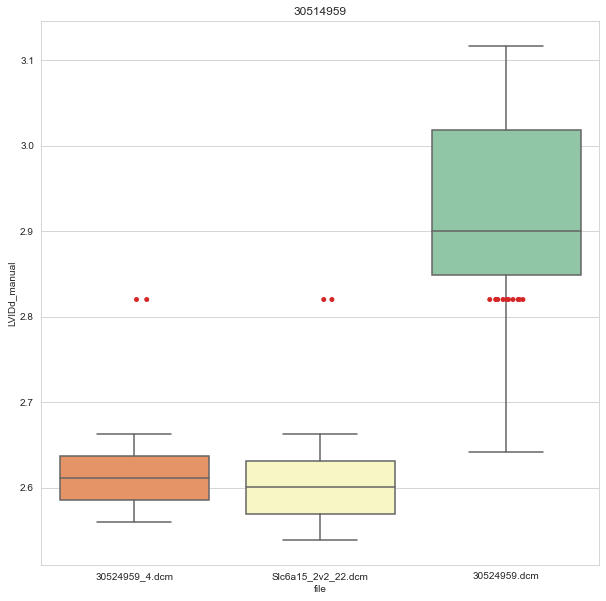

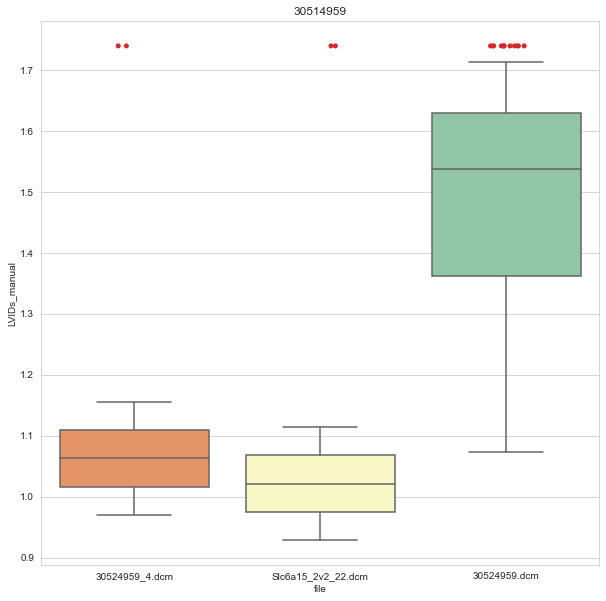

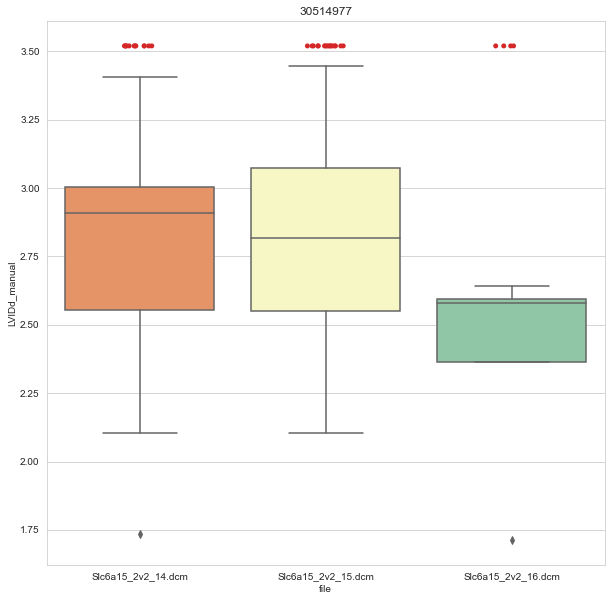

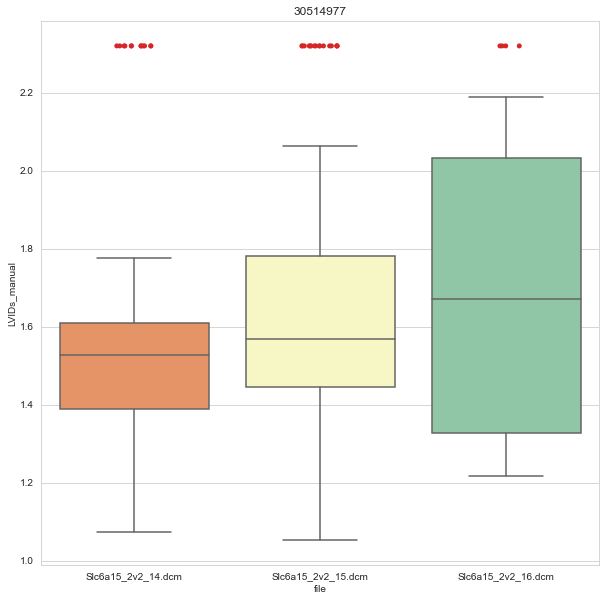

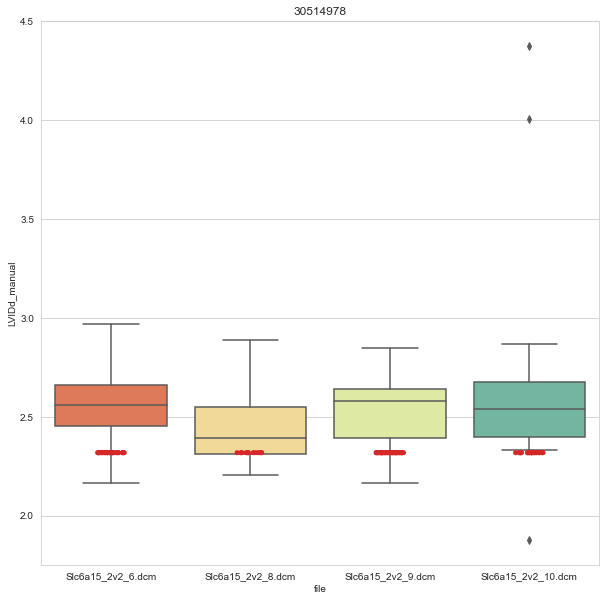

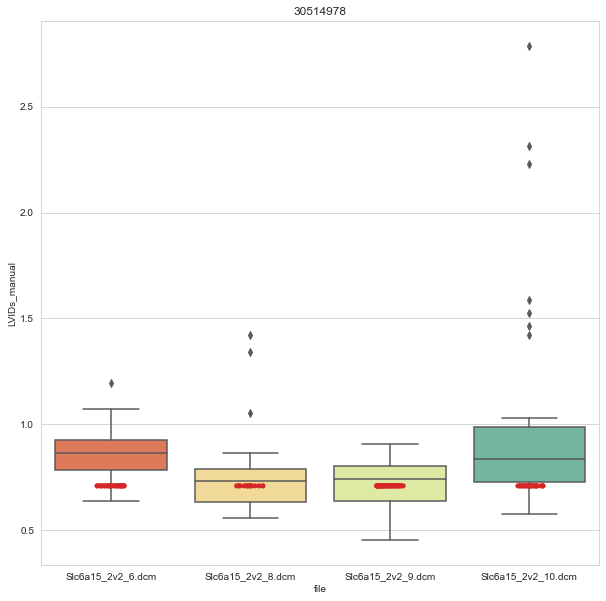

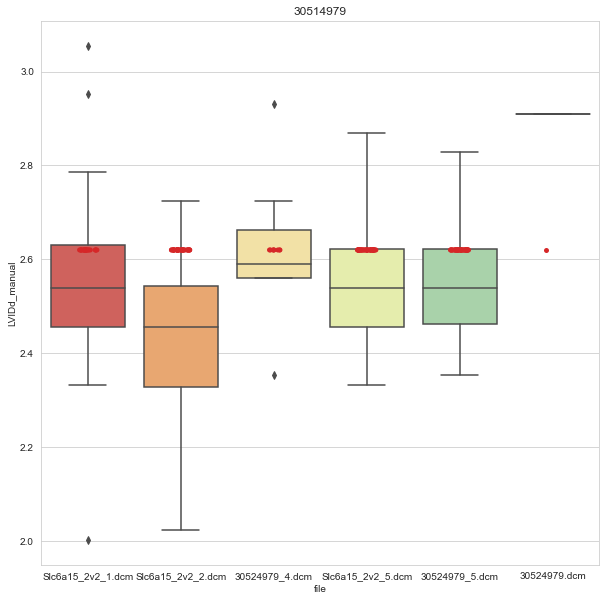

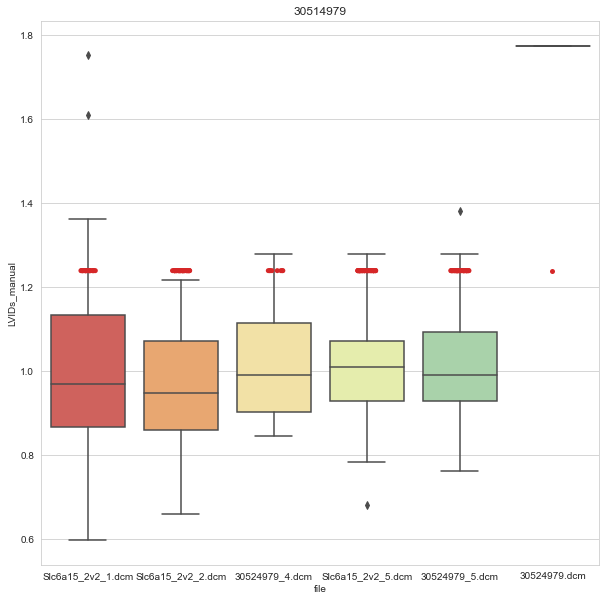

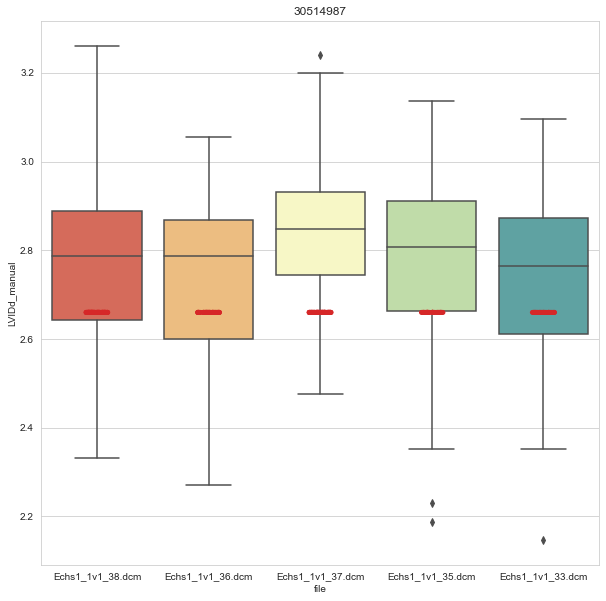

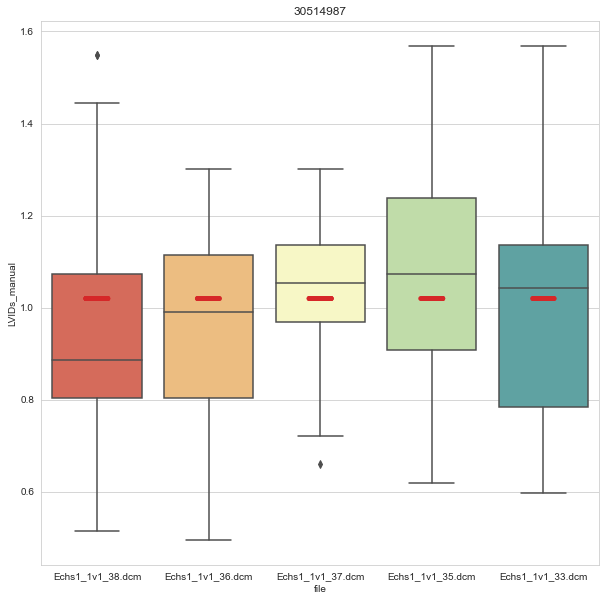

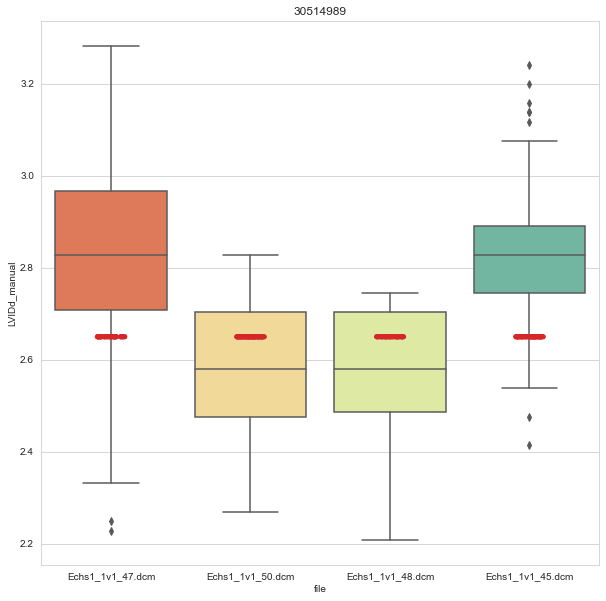

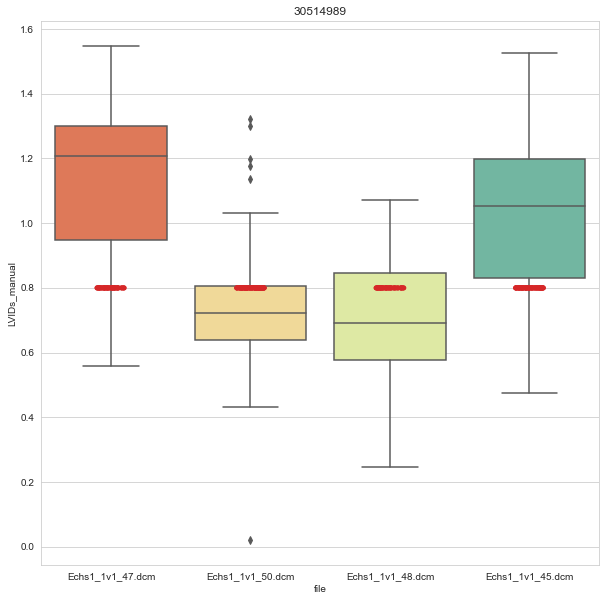

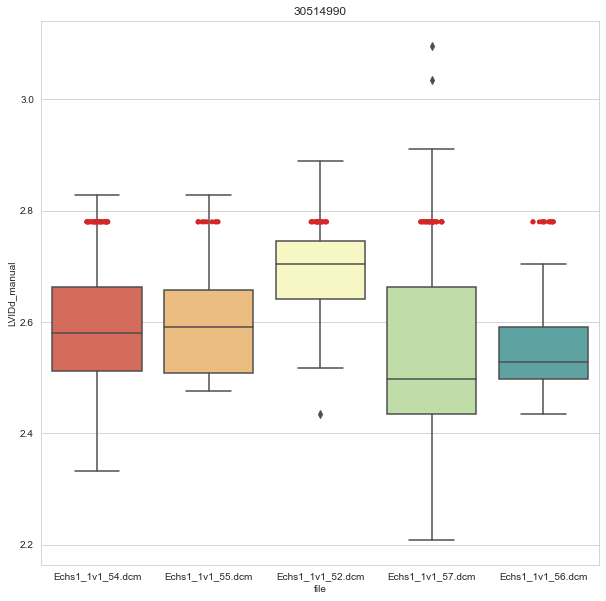

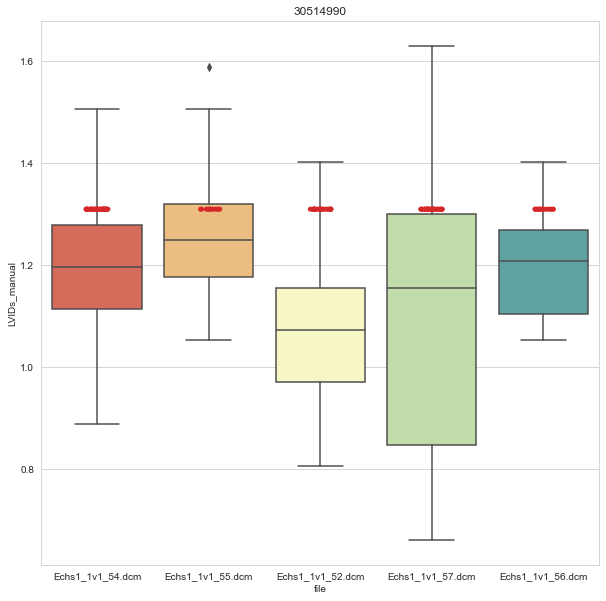

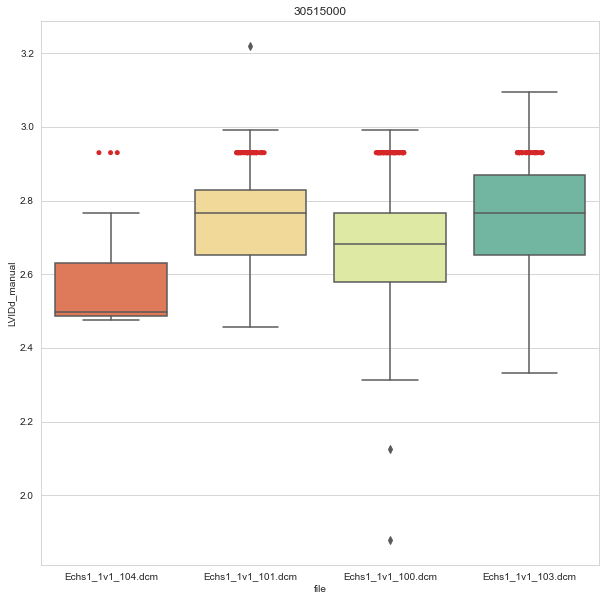

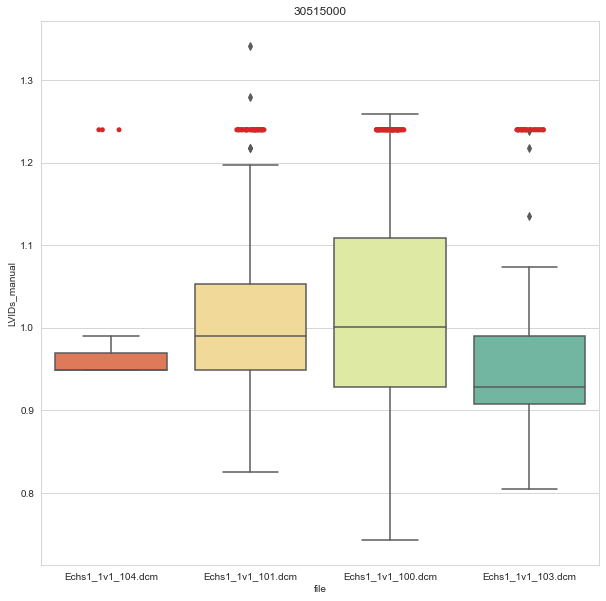

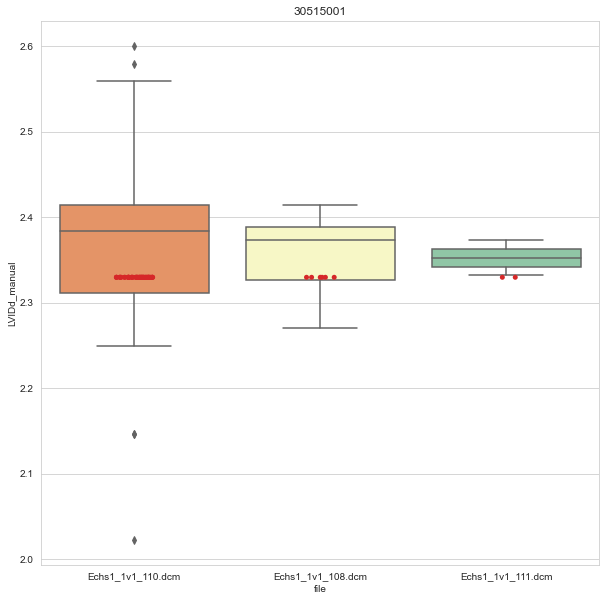

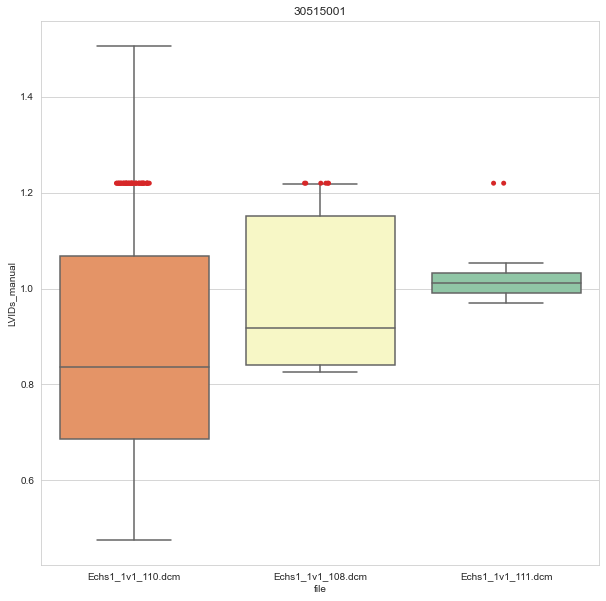

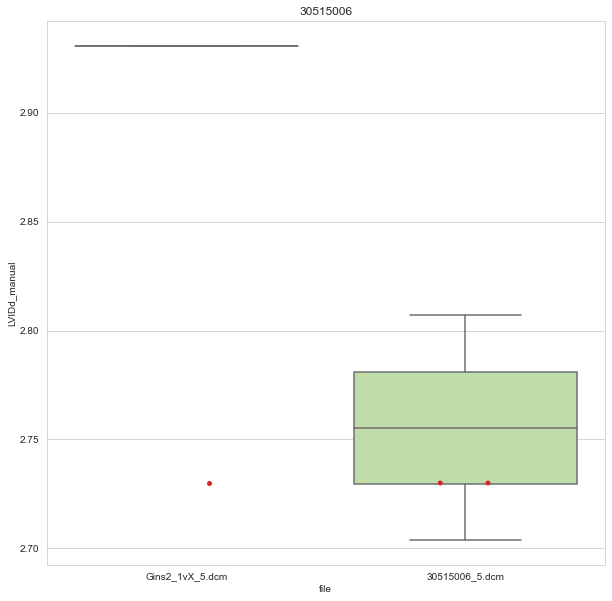

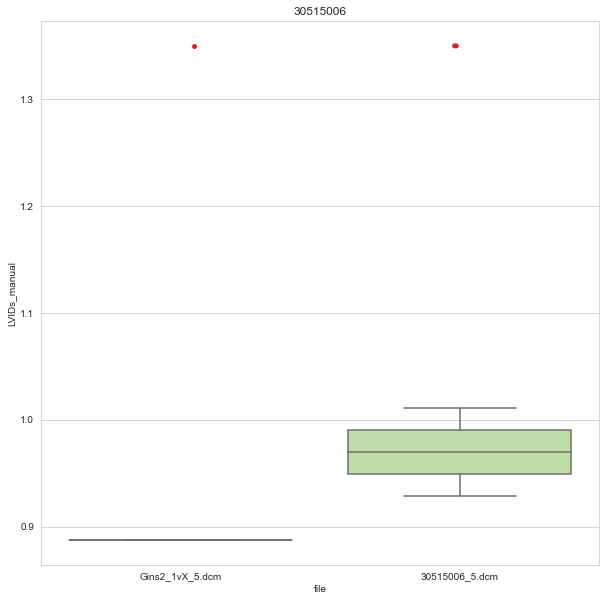

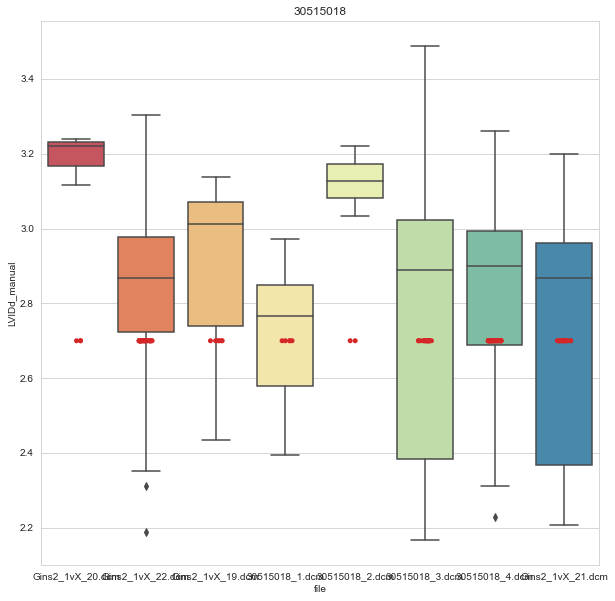

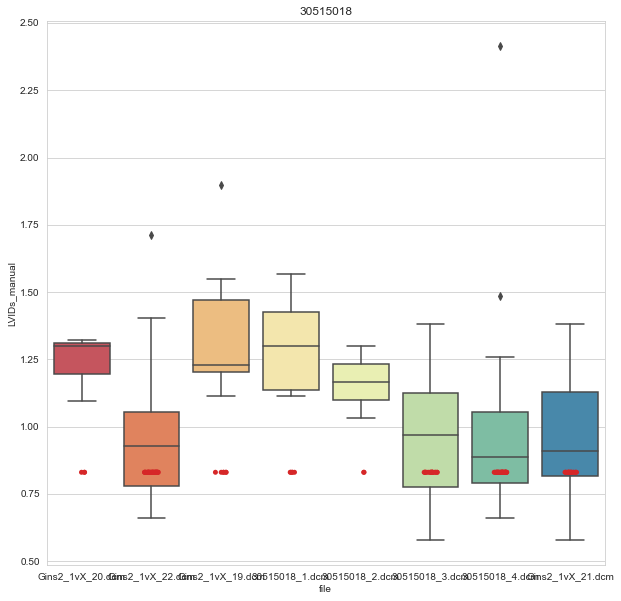

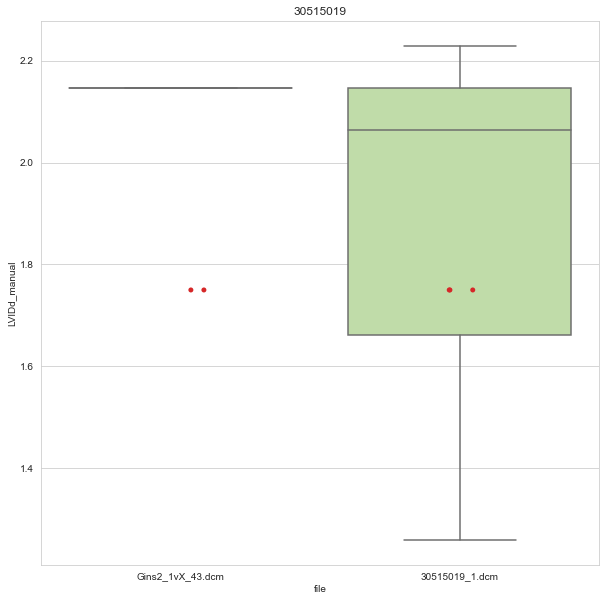

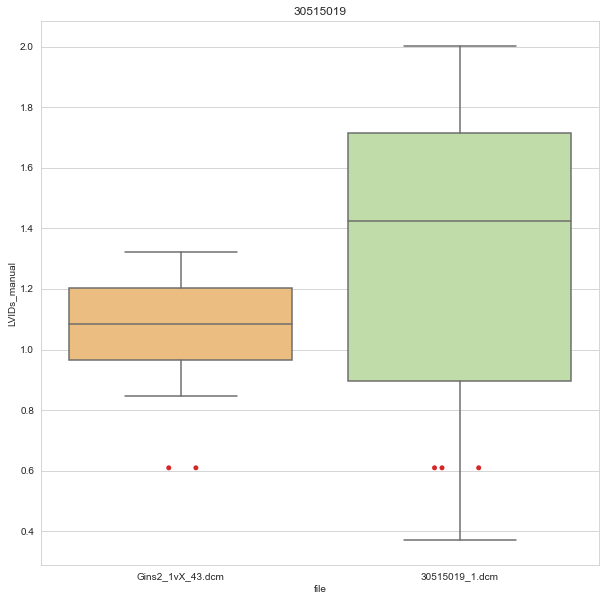

In [10]:
for mouse in mice_automatic:
    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDd_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDd_manual", color=colors2)
    plt.title(mouse)

    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDs_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDs_manual", color=colors2)
    plt.title(mouse)

## Image quality

In [11]:
image_quality = pd.read_csv("../image_quality_all_files.csv")
image_quality = image_quality[image_quality['mouse_id'].isin(mice_manual)]
image_quality

,mouse_id,file_name,high_image_quality,low_image_quality
117,30507366,Arvcf_1vX_197,75.128469,24.871531
118,30507366,Arvcf_1vX_201,38.722730,61.277270
119,30507366,Arvcf_1vX_200,46.968140,53.031860
120,30507366,Arvcf_1vX_199,17.680315,82.319685
121,30507367,Arvcf_1vX_195,86.742035,13.257965
...,...,...,...,...
1906,30514979,Slc6a15_2v2_5,82.353949,17.646051
1907,30514979,30524979_4,18.828165,81.171835
1908,30514979,Slc6a15_2v2_2,71.766318,28.233682
1909,30514979,Slc6a15_2v2_1,43.542309,56.457691


### Image quality per mouse

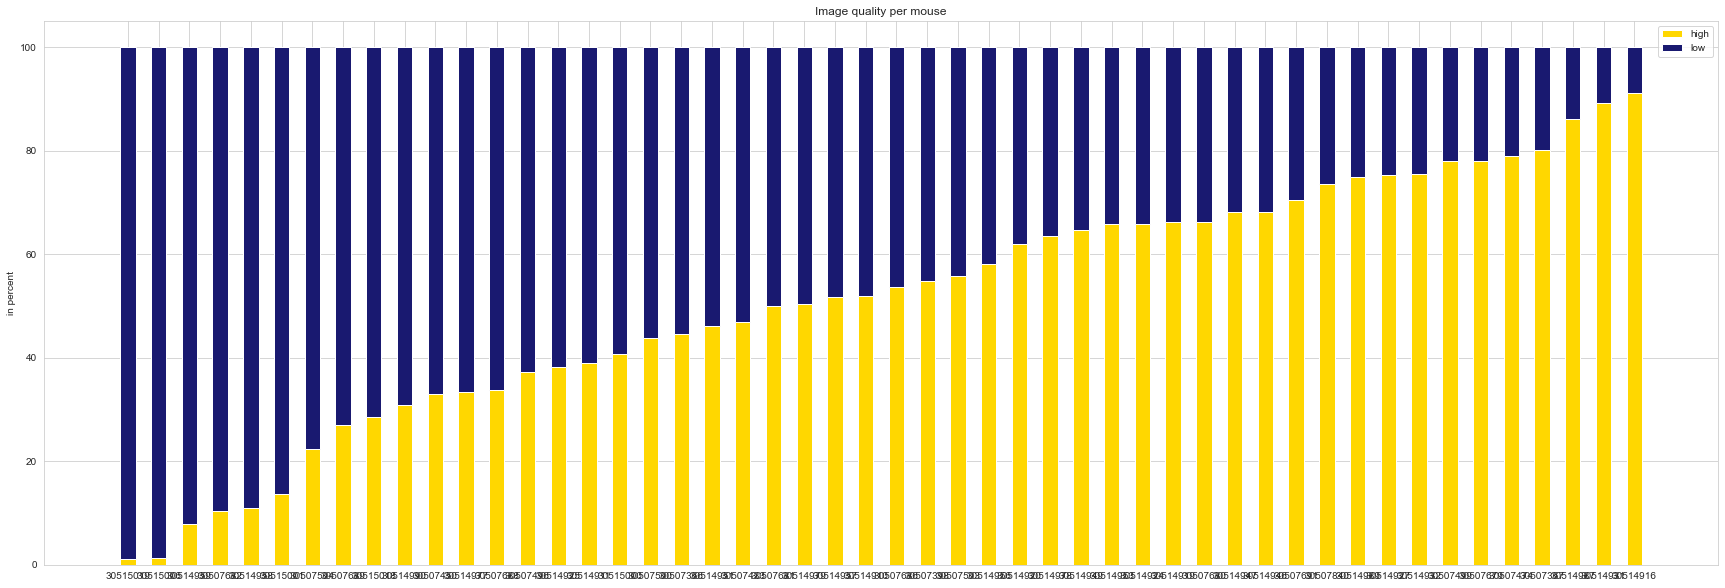

In [12]:
image_quality_mouse = image_quality.groupby(by = ['mouse_id']).mean().reset_index()
image_quality_mouse['mouse_id'] = image_quality_mouse['mouse_id'].astype(str)
image_quality_mouse.sort_values(by=['high_image_quality'], inplace = True)
labels = image_quality_mouse['mouse_id']
good_parts = image_quality_mouse['high_image_quality']
bad_parts = image_quality_mouse['low_image_quality']
width = 0.5   

fig, ax = plt.subplots(figsize=(30,10))

ax.bar(labels, good_parts, width, label='high', color='gold')
ax.bar(labels, bad_parts, width, bottom = good_parts, label='low', color='midnightblue')

ax.set_ylabel('in percent')
ax.set_title('Image quality per mouse')
ax.legend()

plt.show()

### Image quality per line

In [13]:
image_quality = pd.DataFrame([[image_quality['high_image_quality'].describe()['mean'],
                             image_quality['low_image_quality'].describe()['mean']]], 
                             index = [gene],
                             columns= ['high image quality', 'low image quality'])
image_quality = image_quality.round(2)
image_quality

,high image quality,low image quality
Slc6a15,47.23,52.77


## Calculation of stats

In [14]:
# LVIDs diastole 
lvidd_stats = filtered_data[['dif_LVIDd']].describe()
lvidd_stats.rename(columns = {'dif_LVIDd': 'diff LVIDd'}, inplace=True)

In [15]:
# LVIDs systole
lvids_stats = filtered_data[['dif_LVIDs']].describe()
lvids_stats.rename(columns = {'dif_LVIDs': 'diff LVIDs'}, inplace=True)

In [16]:
# Ejection Fraction
ef_stats = filtered_data[['dif_EF']].describe()
ef_stats.rename(columns={'dif_EF':'diff ejection fraction'}, inplace=True)

In [17]:
# Fractional Shortening
fs_stats = filtered_data[['dif_FS']].describe()
fs_stats.rename(columns={'dif_FS':'diff fractional shortening'}, inplace=True)

In [18]:
stats_df = pd.concat([lvidd_stats,
                      lvids_stats,
                      ef_stats,
                      fs_stats
                     ],axis=1)
df = pd.DataFrame([[len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id']))]], 
                  index = ['number of mice'],columns= stats_df.columns)
stats_df = stats_df.append(df)
stats_df.rename(index={'count':'number of measurements'}, inplace=True)
stats_df = stats_df.round(2)
stats_df

,diff LVIDd,diff LVIDs,diff ejection fraction,diff fractional shortening
number of measurements,5129.00,5129.00,5129.00,5129.00
mean,-0.02,-0.13,2.11,3.80
std,0.30,0.30,7.79,9.29
min,-1.81,-1.45,-88.51,-62.37
25%,-0.18,-0.28,-0.54,-1.10
50%,0.00,-0.12,2.44,4.20
75%,0.16,0.03,5.57,9.31
max,3.18,2.12,28.46,44.55
number of mice,50.00,50.00,50.00,50.00


## Calculating p-values with manually annotated data

In [19]:
# Creation of subgroups
f_man = manual[manual['sex'] == 'f']
m_man = manual[manual['sex'] == 'm']

In [20]:
# LVIDs systole
_, f_man_LVIDs = mannwhitneyu(f_man[f_man['genotype'] == 'control']['LVIDs_manual'], f_man[f_man['genotype'] == 'mutant']['LVIDs_manual'], alternative='two-sided', use_continuity=True)
_, m_man_LVIDs = mannwhitneyu(m_man[m_man['genotype'] == 'control']['LVIDs_manual'], m_man[m_man['genotype'] == 'mutant']['LVIDs_manual'], alternative='two-sided', use_continuity=True)
_, man_LVIDs = mannwhitneyu(manual[manual['genotype'] == 'control']['LVIDs_manual'], manual[manual['genotype'] == 'mutant']['LVIDs_manual'], alternative='two-sided', use_continuity=True)

# LVIDs diastole
_, f_man_LVIDd = mannwhitneyu(f_man[f_man['genotype'] == 'control']['LVIDd_manual'], f_man[f_man['genotype'] == 'mutant']['LVIDd_manual'], alternative='two-sided', use_continuity=True)
_, m_man_LVIDd = mannwhitneyu(m_man[m_man['genotype'] == 'control']['LVIDd_manual'], m_man[m_man['genotype'] == 'mutant']['LVIDd_manual'], alternative='two-sided', use_continuity=True)
_, man_LVIDd = mannwhitneyu(manual[manual['genotype'] == 'control']['LVIDd_manual'], manual[manual['genotype'] == 'mutant']['LVIDd_manual'], alternative='two-sided', use_continuity=True)

# Ejection fraction
_, f_man_ef = mannwhitneyu(f_man[f_man['genotype'] == 'control']['EF_manual'], f_man[f_man['genotype'] == 'mutant']['EF_manual'], alternative='two-sided', use_continuity=True)
_, m_man_ef = mannwhitneyu(m_man[m_man['genotype'] == 'control']['EF_manual'], m_man[m_man['genotype'] == 'mutant']['EF_manual'], alternative='two-sided', use_continuity=True)
_, man_ef = mannwhitneyu(manual[manual['genotype'] == 'control']['EF_manual'], manual[manual['genotype'] == 'mutant']['EF_manual'], alternative='two-sided', use_continuity=True)

#Fractional shortening
_, f_man_fs= mannwhitneyu(f_man[f_man['genotype'] == 'control']['FS_manual'], f_man[f_man['genotype'] == 'mutant']['FS_manual'], alternative='two-sided', use_continuity=True)
_, m_man_fs= mannwhitneyu(m_man[m_man['genotype'] == 'control']['FS_manual'], m_man[m_man['genotype'] == 'mutant']['FS_manual'], alternative='two-sided', use_continuity=True)
_, man_fs= mannwhitneyu(manual[manual['genotype'] == 'control']['FS_manual'], manual[manual['genotype'] == 'mutant']['FS_manual'], alternative='two-sided', use_continuity=True)

## Calculating p-values with automatically annotated data

### Creation of subgroups

In [21]:
means_auto = filtered_data.groupby(by = ['mouse_id', 'sex', 'genotype', 'type']).mean().reset_index()
means_auto_f = means_auto[means_auto['sex'] == 'f']
means_auto_m = means_auto[means_auto['sex'] == 'm']

### Wilcoxn-Rank-Sum-Test

In [22]:
# LVIDs systole
_, p_f_auto_LVIDs = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['LVIDs_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['LVIDs_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_LVIDs = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['LVIDs_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['LVIDs_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_LVIDs = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['LVIDs_auto'], means_auto[means_auto['genotype'] == 'mutant']['LVIDs_auto'], alternative='two-sided', use_continuity=True)

In [23]:
# LVIDs diastole
_, p_f_auto_LVIDd = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['LVIDd_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['LVIDd_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_LVIDd = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['LVIDd_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['LVIDd_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_LVIDd = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['LVIDd_auto'], means_auto[means_auto['genotype'] == 'mutant']['LVIDd_auto'], alternative='two-sided', use_continuity=True)

In [24]:
# Ejection fraction
_, p_f_auto_ef = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['EF_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['EF_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_ef = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['EF_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['EF_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_ef = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['EF_auto'], means_auto[means_auto['genotype'] == 'mutant']['EF_auto'], alternative='two-sided', use_continuity=True)

In [25]:
# Fractional shortening
_, p_f_auto_fs = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['FS_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['FS_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_fs = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['FS_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['FS_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_fs = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['FS_auto'], means_auto[means_auto['genotype'] == 'mutant']['FS_auto'], alternative='two-sided', use_continuity=True)

In [26]:
p_values = pd.DataFrame([[f_man_LVIDs, p_f_auto_LVIDs, m_man_LVIDs, p_m_auto_LVIDs ],
                         [f_man_LVIDd, p_f_auto_LVIDd, m_man_LVIDd, p_m_auto_LVIDd ],
                         [f_man_ef   , p_f_auto_ef   , m_man_ef   , p_m_auto_ef    ],
                         [f_man_fs   , p_f_auto_fs   , m_man_fs   , p_m_auto_fs    ]],
                        index = ['LVIDs', 'LVIDd', 'ejection fraction', 'fractional shortening'],
                        columns = ['f manual', 'f automatic', 'm manual', 'm automatic'])

In [27]:
p_values.round(3)

,f manual,f automatic,m manual,m automatic
LVIDs,0.910,0.977,0.095,0.010
LVIDd,0.692,0.843,0.282,0.350
ejection fraction,0.843,0.977,0.165,0.007
fractional shortening,0.843,0.843,0.183,0.012


In [28]:
num_stats = pd.DataFrame(
    [[len(f_man[f_man['genotype'] == 'control']),
      len(means_auto_f[means_auto_f['genotype'] == 'control']),
      len(f_man[f_man['genotype'] == 'mutant']),
      len(means_auto_f[means_auto_f['genotype'] == 'mutant'])],
     [len(m_man[m_man['genotype'] == 'control']),
      len(means_auto_m[means_auto_m['genotype'] == 'control']),
      len(m_man[m_man['genotype'] == 'mutant']),
      len(means_auto_m[means_auto_m['genotype'] == 'mutant'])
    ]],
    index = ['f', 'm'], 
    columns = ['man con', 'auto con', 'man mut', 'auto mut']
)
num_stats

,man con,auto con,man mut,auto mut
f,16,16,9,9
m,16,16,9,9


In [29]:
image_quality.to_csv(gene + '_image_quality_per_line.csv')
num_stats.to_csv(gene + '_number_of_mice.csv')
p_values.to_csv(gene + '_p_values.csv')

In [30]:
def color_p_values(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'coral' if val < 0.05 else ''
    return 'background-color: %s' % color

In [31]:
analysis_overview = p_values.style.applymap(color_p_values).format("{:1.3f}")
analysis_overview

,f manual,f automatic,m manual,m automatic
LVIDs,0.910,0.977,0.095,0.010
LVIDd,0.692,0.843,0.282,0.350
ejection fraction,0.843,0.977,0.165,0.007
fractional shortening,0.843,0.843,0.183,0.012
